In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False
# 낮을수록 True
target_cols_direction = [True, 'center']

In [21]:
csv_path = './output/근골격기능_관절기능.csv'

In [22]:
model_path_man = './model/0303_man.pkl'

In [23]:
model_path_woman = './model/0303_woman.pkl'

## 연령대 제한

In [24]:
len(raw)

1227553

In [25]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [26]:
len(raw)

1213899

In [27]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [28]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        '류마티스인자 (RA Factor)', 'C반응성단백질(CRP)',
               ]

df = raw[cols]

In [29]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,2010,7282,2520,1,42,None,None
1,2010,7490,3638,1,39,음성,None
2,2010,7915,3997,1,36,Negative,None
3,2010,8056,4745,1,42,음성,None
4,2010,8457,3929,1,38,Negative,None


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   검진년도                1213899 non-null  object
 1   UID                 1213899 non-null  int64 
 2   CU_REC_ID           1213899 non-null  int64 
 3   SEX                 1213899 non-null  int64 
 4   검진당시나이              1213899 non-null  int64 
 5   류마티스인자 (RA Factor)  875232 non-null   object
 6   C반응성단백질(CRP)        364692 non-null   object
dtypes: int64(4), object(3)
memory usage: 64.8+ MB


In [31]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '류마티스인자 (RA Factor)',
       'C반응성단백질(CRP)'],
      dtype='object')

In [32]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

## 류마티스인자 (RA Factor) 비정형 -> 정형 변환

In [33]:
# df['류마티스인자 (RA Factor)'].value_counts().head(200)

In [34]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace('<', '')

In [35]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace('>', '')

In [36]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace(' ', '')

In [37]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace('-', '')

In [38]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace('(', '')

In [39]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace(')', '')

In [40]:
df['류마티스인자 (RA Factor)'].replace(to_replace=['음성', 'Negative', '-', 'Nonreactive', 'negative'], value=np.NaN, inplace=True)

In [41]:
df['류마티스인자 (RA Factor)'].replace(to_replace=['양성', 'Positive', '+'], value = 20, inplace=True)

In [42]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace('음성', '')

In [43]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace('양성', '')

In [44]:
df['류마티스인자 (RA Factor)'] = df['류마티스인자 (RA Factor)'].str.replace('이하', '')

In [45]:
# df['류마티스인자 (RA Factor)'].value_counts().head(300)

## C반응성단백질(CRP) 비정형 -> 정형 변환

In [46]:
# df['C반응성단백질(CRP)'] = df['C반응성단백질(CRP)'].str.replace('<', '')

In [47]:
# df['C반응성단백질(CRP)'] = df['C반응성단백질(CRP)'].str.replace('>', '')

In [48]:
df['C반응성단백질(CRP)'] = df['C반응성단백질(CRP)'].str.replace(' ', '')

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [49]:
numeric_col = df.columns

In [50]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   검진년도                1213899 non-null  int64  
 1   UID                 1213899 non-null  int64  
 2   CU_REC_ID           1213899 non-null  int64  
 3   SEX                 1213899 non-null  int64  
 4   검진당시나이              1213899 non-null  int64  
 5   류마티스인자 (RA Factor)  688638 non-null   float64
 6   C반응성단백질(CRP)        298862 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 64.8 MB


In [52]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,688638.000000,298862.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,8.915667,0.328040
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,16.513194,2.114082
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,5.000000,0.030000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,7.000000,0.100000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,10.000000,0.200000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2194.200000,334.000000


In [53]:
df_result = df.copy()

# 이상치 제거

In [54]:
len(df_result)

1213899

In [55]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 2.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 2.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [56]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [57]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : -7.5 maximum : 22.5
류마티스인자 (RA Factor) : 1213899 / IQR outliers:  22808 / ratio : 0.018789042580972554

minimum : -0.395 maximum : 0.625
C반응성단백질(CRP) : 1213899 / IQR outliers:  28078 / ratio : 0.02313042518364378



In [58]:
target_cols

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [59]:
minimums

[-7.5, -0.395]

In [60]:
maximums

[22.5, 0.625]

In [61]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163888 entries, 0 to 1163887
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   검진년도                1163888 non-null  int64  
 1   UID                 1163888 non-null  int64  
 2   CU_REC_ID           1163888 non-null  int64  
 3   SEX                 1163888 non-null  int64  
 4   검진당시나이              1163888 non-null  int64  
 5   류마티스인자 (RA Factor)  641019 non-null   float64
 6   C반응성단백질(CRP)        263897 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 62.2 MB


In [62]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN


In [63]:
len(df_result)

1163888

In [64]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163888 entries, 0 to 1163887
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   검진년도                1163888 non-null  int64  
 1   UID                 1163888 non-null  int64  
 2   CU_REC_ID           1163888 non-null  int64  
 3   SEX                 1163888 non-null  int64  
 4   검진당시나이              1163888 non-null  int64  
 5   류마티스인자 (RA Factor)  641019 non-null   float64
 6   C반응성단백질(CRP)        263897 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 62.2 MB


In [65]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
count,1.163888e+06,1.163888e+06,1.163888e+06,1.163888e+06,1.163888e+06,641019.000000,263897.000000
mean,2.021869e+03,5.084488e+05,1.490037e+06,1.371567e+00,4.065402e+01,7.171940,0.118385
std,1.704773e+00,3.651736e+05,7.937107e+05,4.832236e-01,8.913866e+00,3.695031,0.133846
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.000000
25%,2.021000e+03,2.212730e+05,6.799688e+05,1.000000e+00,3.400000e+01,4.900000,0.030000
50%,2.022000e+03,3.803990e+05,1.401944e+06,1.000000e+00,4.000000e+01,7.000000,0.080000
75%,2.023000e+03,8.357350e+05,2.173174e+06,2.000000e+00,4.800000e+01,10.000000,0.150000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,22.500000,0.621000


# target (건강지수) 계산

In [66]:
len(df_result)

1163888

## Linear Regression coefficient 계산

In [67]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [68]:
# target_cols

In [69]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [70]:
# df_man[df_man['target'].isna()]

In [71]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [72]:
# df_target = pd.concat([df_man, df_woman])

In [73]:
# len(df_target)

In [74]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [75]:
# len(df_target)

In [76]:
# df_target[df_target['target'].isna()]

In [77]:
# df_target.info()

In [78]:
# df_target.head()

In [79]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [80]:
# len(df_target)

In [81]:
# df_target.describe()

In [82]:
# df_target[df_target['target'] == 50]

In [83]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [84]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [85]:
# len(df_target)

In [86]:
# df_target.head()

In [87]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

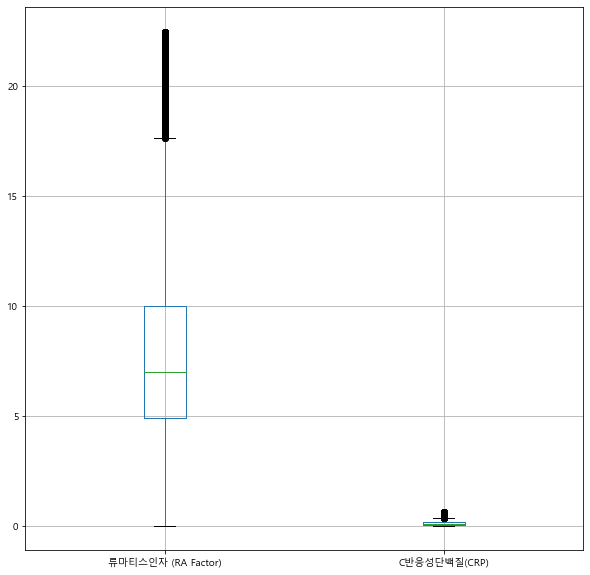

In [88]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [89]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN


In [90]:
target_cols

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [91]:
len(target_cols)

2

In [92]:
target_cols_direction

[True, 'center']

In [93]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):            
        
            input_data = tmp_data3[col].copy()
            # 결측치가 많을 때 평균을 넣게 되면 평균으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            
                
                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값
                
                '''
                display print
                '''
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)
                
                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                elif target_cols_direction[index] == 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 2) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]
                
                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [94]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

341.79140 sec


In [95]:
df_target['kde_mean'].min()

1.71

In [96]:
df_target['kde_mean'].max()

197.7

In [97]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean
19,2019,153543,325845,1,20,9.55,NaN,87.93,100.00,93.96
17,2019,152079,325977,1,20,11.50,0.09,14.58,143.29,78.94
42,2019,392728,325980,1,20,6.20,0.12,100.63,108.62,104.62
44,2019,438481,325982,1,20,9.00,0.02,58.90,200.00,129.45
45,2019,439691,326889,1,20,NaN,NaN,100.00,100.00,100.00
18,2019,153352,327360,1,20,NaN,NaN,100.00,100.00,100.00
13,2019,130234,328771,1,20,7.40,NaN,83.17,100.00,91.58
35,2019,339160,328877,1,20,6.20,NaN,100.63,100.00,100.32
8,2019,41096,329045,1,20,7.12,NaN,90.87,100.00,95.44
9,2019,117629,330495,1,20,NaN,NaN,100.00,100.00,100.00


In [98]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean
count,1.163888e+06,1.163888e+06,1.163888e+06,1.163888e+06,1.163888e+06,641019.000000,263897.000000,1.163888e+06,1.163888e+06,1.163888e+06
mean,2.021869e+03,5.084488e+05,1.490037e+06,1.371567e+00,4.065402e+01,7.171940,0.118385,1.000504e+02,1.080115e+02,1.040310e+02
std,1.704773e+00,3.651736e+05,7.937107e+05,4.832236e-01,8.913866e+00,3.695031,0.133846,2.868153e+01,3.393007e+01,2.185223e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.000000,2.400000e-01,1.000000e-02,1.710000e+00
25%,2.021000e+03,2.212730e+05,6.799688e+05,1.000000e+00,3.400000e+01,4.900000,0.030000,9.812000e+01,1.000000e+02,1.000000e+02
50%,2.022000e+03,3.803990e+05,1.401944e+06,1.000000e+00,4.000000e+01,7.000000,0.080000,1.000000e+02,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.357350e+05,2.173174e+06,2.000000e+00,4.800000e+01,10.000000,0.150000,1.004300e+02,1.000000e+02,1.076000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,22.500000,0.621000,1.984500e+02,2.005700e+02,1.977000e+02


<AxesSubplot:>

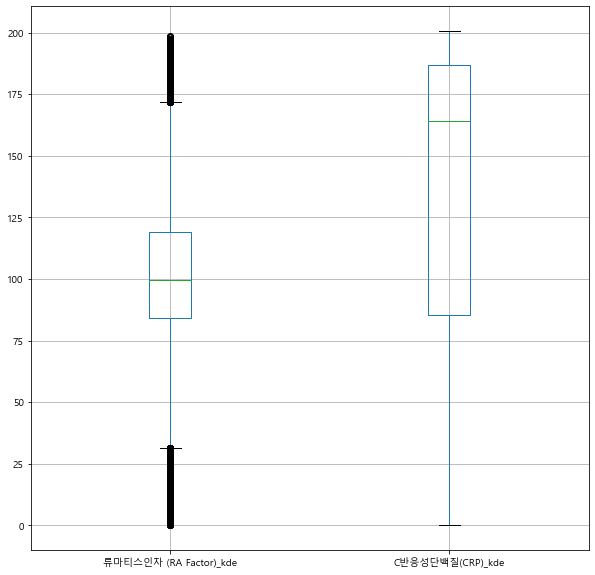

In [99]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['류마티스인자 (RA Factor)_kde', 'C반응성단백질(CRP)_kde'])

## target Scaling

In [100]:
df_target['kde_mean'].max()

197.7

In [101]:
df_target['kde_mean'].min()

1.71

In [102]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [103]:
df_target['target'] = (df_target['target'] * 100) + 50

In [104]:
df_target['target'] = df_target['target'].round(0)

In [105]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,1
96,52.0,43
95,53.0,130
91,54.0,298
80,55.0,378
83,56.0,363
86,57.0,337
81,58.0,368
82,59.0,363
88,60.0,315


In [106]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
count,1.163888e+06,1.163888e+06,1.163888e+06,1.163888e+06,1.163888e+06,641019.000000,263897.000000,1.163888e+06,1.163888e+06,1.163888e+06,1.163888e+06
mean,2.021869e+03,5.084488e+05,1.490037e+06,1.371567e+00,4.065402e+01,7.171940,0.118385,1.000504e+02,1.080115e+02,1.040310e+02,1.020141e+02
std,1.704773e+00,3.651736e+05,7.937107e+05,4.832236e-01,8.913866e+00,3.695031,0.133846,2.868153e+01,3.393007e+01,2.185223e+01,1.092920e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.000000,2.400000e-01,1.000000e-02,1.710000e+00,5.100000e+01
25%,2.021000e+03,2.212730e+05,6.799688e+05,1.000000e+00,3.400000e+01,4.900000,0.030000,9.812000e+01,1.000000e+02,1.000000e+02,1.000000e+02
50%,2.022000e+03,3.803990e+05,1.401944e+06,1.000000e+00,4.000000e+01,7.000000,0.080000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.357350e+05,2.173174e+06,2.000000e+00,4.800000e+01,10.000000,0.150000,1.004300e+02,1.000000e+02,1.076000e+02,1.040000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,22.500000,0.621000,1.984500e+02,2.005700e+02,1.977000e+02,1.490000e+02


<AxesSubplot:>

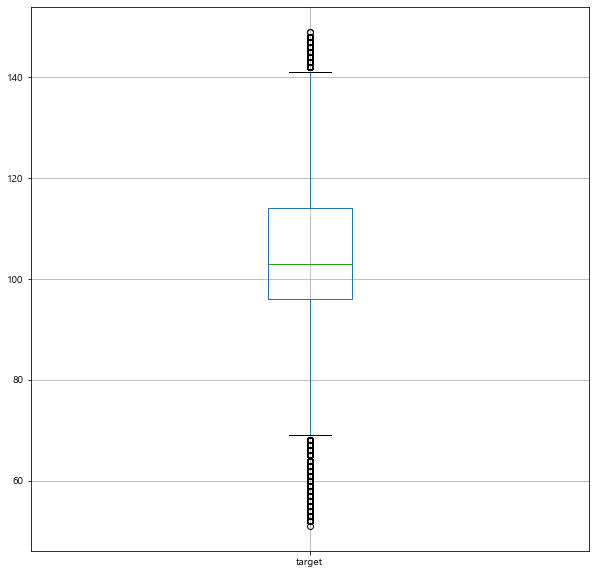

In [107]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

In [108]:
df_target[df_target['C반응성단백질(CRP)'].notnull()]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
171575,2010,622856,967,1,35,11.50,0.060,21.29,199.99,110.64,105.0
537335,2010,592257,1016,1,49,9.84,0.000,79.59,109.69,94.64,97.0
171563,2010,271157,1026,1,35,2.82,0.280,146.98,45.85,96.42,98.0
125967,2010,628540,1049,1,33,3.10,0.100,142.06,179.67,160.86,130.0
466527,2010,598354,1104,1,46,NaN,0.250,100.00,43.66,71.83,86.0
...,...,...,...,...,...,...,...,...,...,...,...
730626,2024,1251150,2871261,1,66,10.00,0.100,100.00,191.35,145.68,123.0
730627,2024,1251150,2871262,1,66,10.00,0.100,100.00,191.35,145.68,123.0
1011638,2024,1242317,2871326,2,41,10.00,0.001,84.79,167.68,126.24,113.0
530107,2024,1473151,2871339,1,48,10.00,0.100,80.43,180.96,130.70,115.0


In [109]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
306118,2010,609272,143,1,40,NaN,NaN,100.00,100.0,100.00,100.0
512472,2010,593983,156,1,48,4.6,NaN,121.16,100.0,110.58,105.0
279721,2010,612330,185,1,39,NaN,NaN,100.00,100.0,100.00,100.0
25071,2010,645901,212,1,28,9.4,NaN,63.26,100.0,81.63,91.0
772924,2010,710490,213,2,28,11.2,NaN,36.74,100.0,68.37,84.0
445051,2010,491012,226,1,45,3.9,NaN,112.91,100.0,106.46,103.0
734846,2010,315847,230,2,23,4.1,NaN,146.47,100.0,123.24,112.0
737170,2010,719072,231,2,24,8.2,NaN,83.00,100.0,91.50,96.0
249538,2010,614169,238,1,38,3.9,NaN,122.51,100.0,111.26,106.0
365498,2010,605512,253,1,42,3.9,NaN,129.66,100.0,114.83,107.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

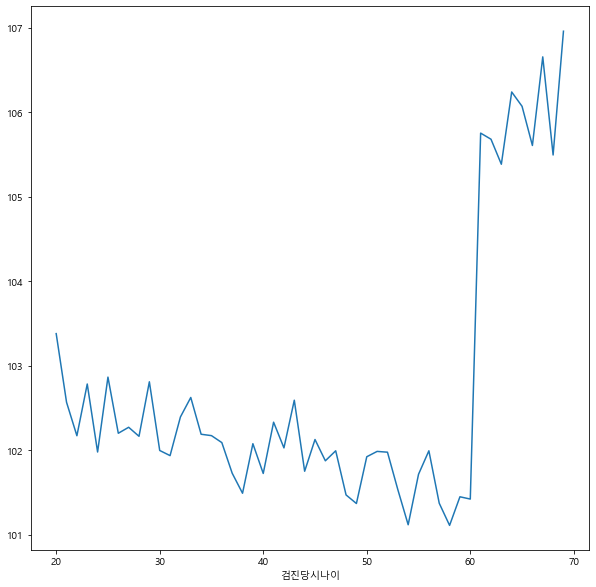

In [110]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

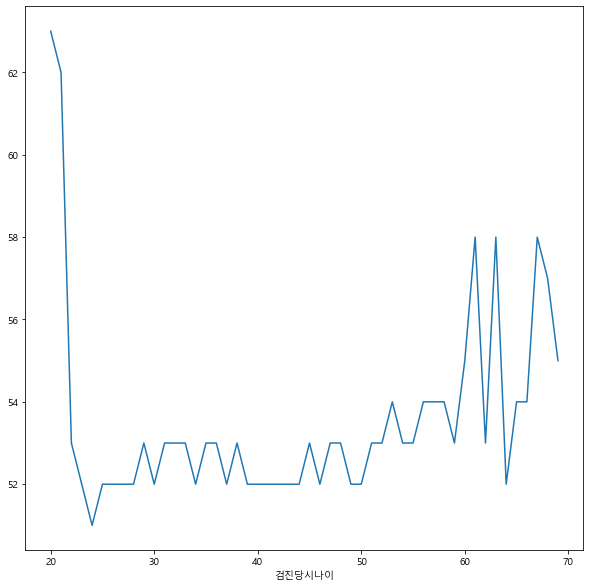

In [111]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

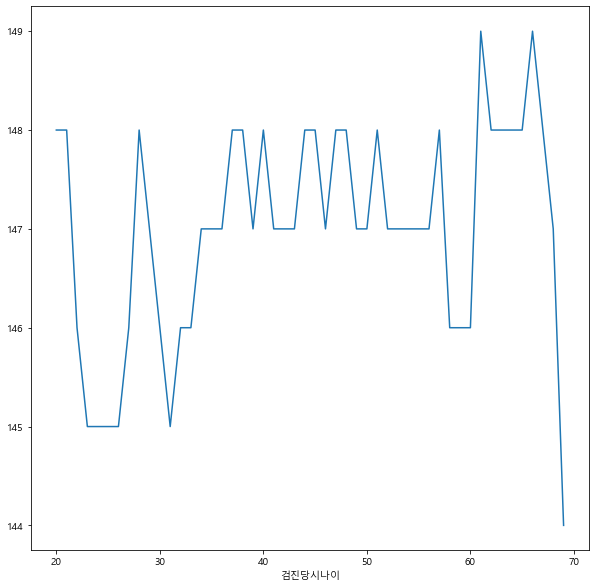

In [112]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [113]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
306118,2010,609272,143,1,40,NaN,NaN,100.00,100.0,100.00,100.0
512472,2010,593983,156,1,48,4.6,NaN,121.16,100.0,110.58,105.0
279721,2010,612330,185,1,39,NaN,NaN,100.00,100.0,100.00,100.0
25071,2010,645901,212,1,28,9.4,NaN,63.26,100.0,81.63,91.0
772924,2010,710490,213,2,28,11.2,NaN,36.74,100.0,68.37,84.0


# 결측행 제거

In [114]:
# df_result.dropna(axis=0).info()

In [115]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [116]:
df_target['SEX'].value_counts()

1    731426
2    432462
Name: SEX, dtype: int64

In [117]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

731426

In [118]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
306118,2010,609272,143,1,40,NaN,NaN,100.00,100.0,100.00,100.0
512472,2010,593983,156,1,48,4.6,NaN,121.16,100.0,110.58,105.0
279721,2010,612330,185,1,39,NaN,NaN,100.00,100.0,100.00,100.0
25071,2010,645901,212,1,28,9.4,NaN,63.26,100.0,81.63,91.0
445051,2010,491012,226,1,45,3.9,NaN,112.91,100.0,106.46,103.0


# 결측치 처리

## 결측치 삭제

In [119]:
# df_man.dropna(inplace=True)

In [120]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
306118,2010,609272,143,1,40,NaN,NaN,100.00,100.0,100.00,100.0
512472,2010,593983,156,1,48,4.6,NaN,121.16,100.0,110.58,105.0
279721,2010,612330,185,1,39,NaN,NaN,100.00,100.0,100.00,100.0
25071,2010,645901,212,1,28,9.4,NaN,63.26,100.0,81.63,91.0
445051,2010,491012,226,1,45,3.9,NaN,112.91,100.0,106.46,103.0


## 결측치 평균으로 대체

In [121]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [122]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [123]:
target_cols

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [124]:
len(df_man)

731426

In [125]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [126]:
len(df_man)

422502

In [127]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
512472,2010,593983,156,1,48,4.6,NaN,121.16,100.0,110.58,105.0
25071,2010,645901,212,1,28,9.4,NaN,63.26,100.0,81.63,91.0
445051,2010,491012,226,1,45,3.9,NaN,112.91,100.0,106.46,103.0
249538,2010,614169,238,1,38,3.9,NaN,122.51,100.0,111.26,106.0
365498,2010,605512,253,1,42,3.9,NaN,129.66,100.0,114.83,107.0


## fillna

In [128]:
df_man.mean().round(2)

검진년도                         2022.21
UID                        533704.96
CU_REC_ID                 1552452.03
SEX                             1.00
검진당시나이                         42.09
류마티스인자 (RA Factor)              7.04
C반응성단백질(CRP)                    0.13
류마티스인자 (RA Factor)_kde         97.81
C반응성단백질(CRP)_kde              113.52
kde_mean                      105.66
target                        102.83
dtype: float64

In [129]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [130]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [131]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [132]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 스크리닝

## 스크리닝

In [133]:
# screening = 80

In [134]:
# scr_col = 'ALP'

In [135]:
# df_man[df_man[scr_col] < screening].head()

In [136]:
# len(df_man[df_man[scr_col] < screening])

In [137]:
# df_man.loc[df_man[scr_col] < screening, scr_col] = screening

In [138]:
# df_man[df_man[scr_col] < screening].head()

In [139]:
# len(df_man[df_man[scr_col] < screening])

# 중복 제거

In [140]:
len(df_man)

422502

In [141]:
len(df_man)

422502

In [142]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [143]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
631825,2019,50,356493,1,53,6.00,0.13,99.93,100.00,99.96,100.0
402323,2022,62,1356310,1,43,6.00,0.07,100.13,200.00,150.06,125.0
433532,2023,62,2170394,1,44,7.00,0.11,96.67,174.49,135.58,118.0
610685,2020,67,481109,1,52,17.70,0.13,3.00,100.00,51.50,76.0
634606,2021,67,643695,1,53,10.70,0.13,63.18,100.00,81.59,91.0
615817,2022,76,1377275,1,52,7.00,0.13,97.91,100.00,98.96,99.0
615816,2022,76,1359161,1,52,7.00,0.13,97.91,100.00,98.96,99.0
51088,2023,77,1739126,1,29,6.30,0.13,98.46,100.00,99.23,100.0
78943,2024,77,2575587,1,30,5.60,0.13,101.95,100.00,100.98,100.0
706562,2022,79,1369378,1,58,9.80,0.13,75.74,100.00,87.87,94.0


In [144]:
len(df_man)

422502

In [145]:
df_man[target_cols]

,류마티스인자 (RA Factor),C반응성단백질(CRP)
631825,6.0,0.130
402323,6.0,0.070
433532,7.0,0.110
610685,17.7,0.130
634606,10.7,0.130
...,...,...
729951,10.0,0.130
729950,10.0,0.130
52536,10.0,0.001
12110,10.0,0.200


## first만 남겨두고 중복 제거

In [146]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [147]:
len(df_man)

380745

In [148]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
631825,2019,50,356493,1,53,6.00,0.13,99.93,100.00,99.96,100.0
402323,2022,62,1356310,1,43,6.00,0.07,100.13,200.00,150.06,125.0
433532,2023,62,2170394,1,44,7.00,0.11,96.67,174.49,135.58,118.0
610685,2020,67,481109,1,52,17.70,0.13,3.00,100.00,51.50,76.0
634606,2021,67,643695,1,53,10.70,0.13,63.18,100.00,81.59,91.0
615817,2022,76,1377275,1,52,7.00,0.13,97.91,100.00,98.96,99.0
51088,2023,77,1739126,1,29,6.30,0.13,98.46,100.00,99.23,100.0
78943,2024,77,2575587,1,30,5.60,0.13,101.95,100.00,100.98,100.0
706562,2022,79,1369378,1,58,9.80,0.13,75.74,100.00,87.87,94.0
716362,2023,79,2667016,1,59,7.00,0.13,90.69,100.00,95.34,98.0


In [149]:
df_man.reset_index(drop=True, inplace=True)

In [150]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
0,2019,50,356493,1,53,6.0,0.13,99.93,100.00,99.96,100.0
1,2022,62,1356310,1,43,6.0,0.07,100.13,200.00,150.06,125.0
2,2023,62,2170394,1,44,7.0,0.11,96.67,174.49,135.58,118.0
3,2020,67,481109,1,52,17.7,0.13,3.00,100.00,51.50,76.0
4,2021,67,643695,1,53,10.7,0.13,63.18,100.00,81.59,91.0


In [151]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380745 entries, 0 to 380744
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   검진년도                    380745 non-null  int64  
 1   UID                     380745 non-null  int64  
 2   CU_REC_ID               380745 non-null  int64  
 3   SEX                     380745 non-null  int64  
 4   검진당시나이                  380745 non-null  int64  
 5   류마티스인자 (RA Factor)      380745 non-null  float64
 6   C반응성단백질(CRP)            380745 non-null  float64
 7   류마티스인자 (RA Factor)_kde  380745 non-null  float64
 8   C반응성단백질(CRP)_kde        380745 non-null  float64
 9   kde_mean                380745 non-null  float64
 10  target                  380745 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 32.0 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

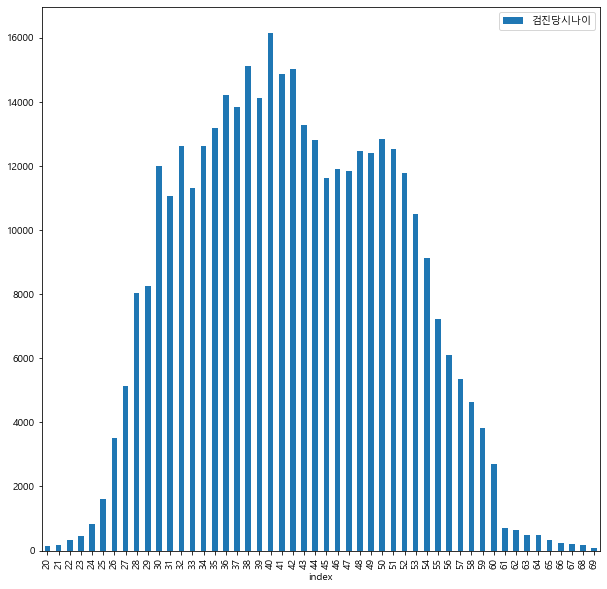

In [152]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [153]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,137
46,21,180
43,22,324
41,23,468
36,24,818
35,25,1598
33,26,3506
30,27,5126
26,28,8037
25,29,8260


# 검진항목 시각화

In [154]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
count,380745.000000,3.807450e+05,3.807450e+05,380745.0,380745.000000,380745.000000,380745.000000,380745.000000,380745.000000,380745.000000,380745.000000
mean,2022.137073,5.248375e+05,1.519068e+06,1.0,42.028310,7.032556,0.129101,97.882835,113.741334,105.812031,102.903670
std,1.515023,3.695659e+05,8.070409e+05,0.0,8.852908,3.670367,0.084046,37.828016,43.505713,28.448148,14.227966
min,2010.000000,5.000000e+01,1.560000e+02,1.0,20.000000,0.000000,0.000000,0.300000,0.010000,1.710000,51.000000
25%,2021.000000,2.261890e+05,6.778880e+05,1.0,35.000000,4.800000,0.100000,81.040000,100.000000,91.100000,96.000000
50%,2022.000000,3.918060e+05,1.407736e+06,1.0,42.000000,7.000000,0.130000,99.780000,100.000000,101.690000,101.000000
75%,2023.000000,8.486230e+05,2.253506e+06,1.0,49.000000,9.100000,0.130000,113.960000,129.150000,122.680000,111.000000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,22.500000,0.621000,198.310000,200.460000,197.170000,149.000000


<AxesSubplot:xlabel='검진당시나이'>

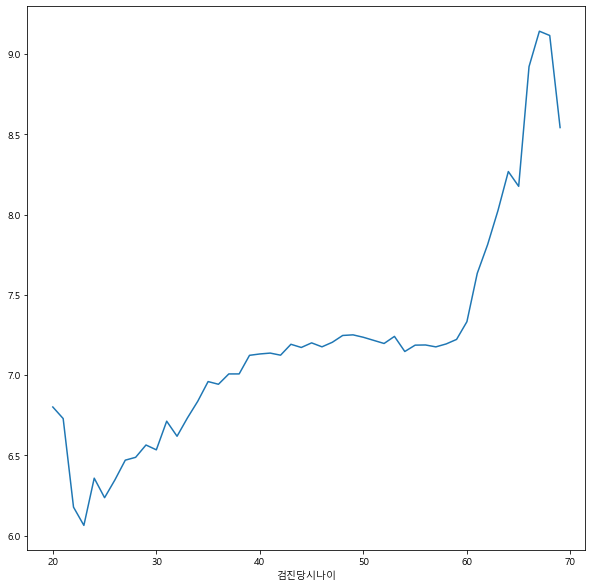

In [155]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

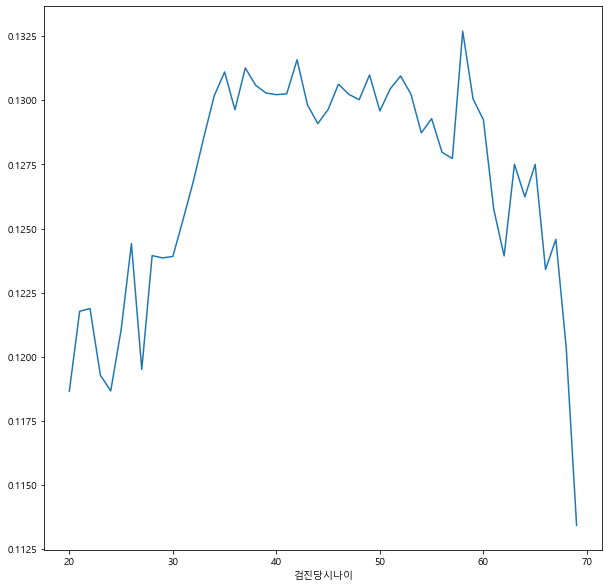

In [156]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

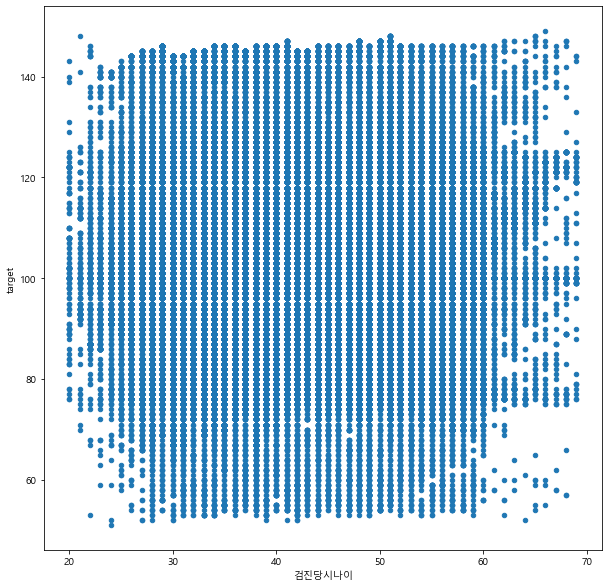

In [157]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

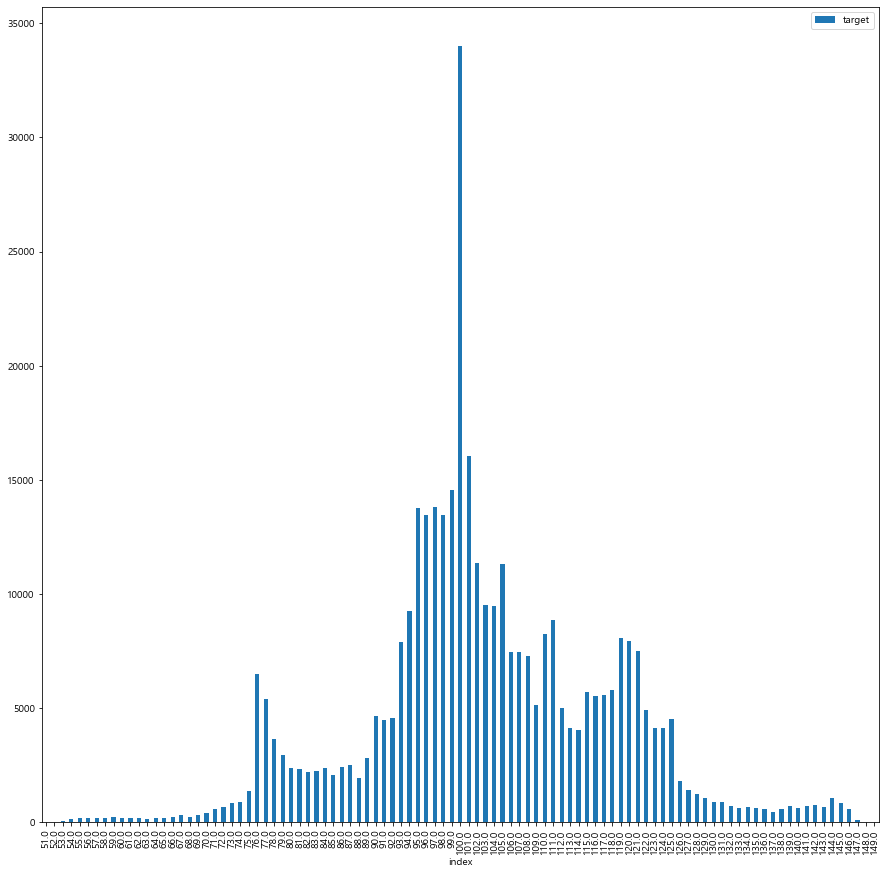

In [158]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [159]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
97,51.0,1
96,52.0,11
94,53.0,56
92,54.0,162
83,55.0,206
86,56.0,187
85,57.0,187
82,58.0,207
80,59.0,235
84,60.0,189


In [160]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [161]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

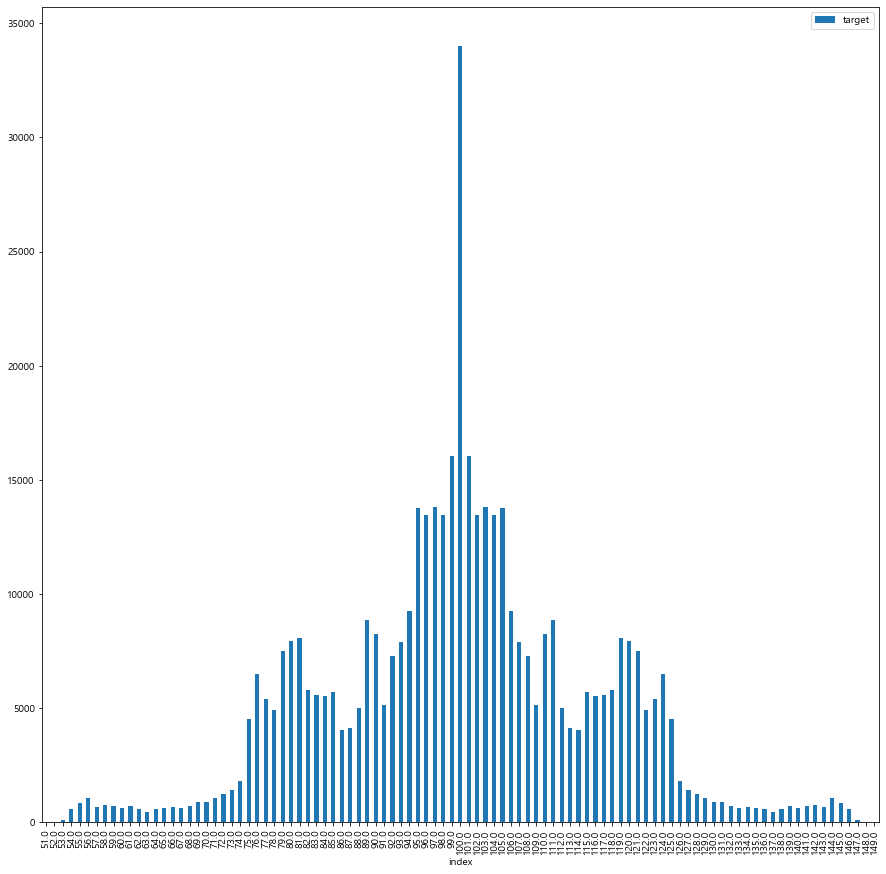

In [162]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [163]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,1
96,52.0,14
94,53.0,107
90,54.0,572
65,55.0,855
58,56.0,1079
75,57.0,672
68,58.0,775
69,59.0,730
84,60.0,615


# 나이별 확인하기

In [164]:
# target = 'target'

In [165]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [166]:
# df_man = df_man_sample

In [167]:
# int(df_man['검진당시나이'].value_counts().mean())

In [168]:
# df_man['검진당시나이'].min()

In [169]:
# df_man['검진당시나이'].max()

In [170]:
# df_man.columns

In [171]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [172]:
# df_temp.info()

In [173]:
# df_temp.reset_index(drop=True, inplace=True)

In [174]:
# df_man = df_temp.copy()

In [175]:
# df_man['검진당시나이'].value_counts()

In [176]:
# df_man[df_man['검진당시나이']==38]

In [177]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [178]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '류마티스인자 (RA Factor)',
       'C반응성단백질(CRP)', '류마티스인자 (RA Factor)_kde', 'C반응성단백질(CRP)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [179]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [180]:
target_cols

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [181]:
train_columns = target_cols

In [182]:
target_col = 'target'

## Min Max Scaling

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
scaling_bool

False

In [185]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [186]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [187]:
# model = LinearRegression()

In [188]:
# model.fit(X_train, y_train)

In [189]:
# model.intercept_

In [190]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [191]:
# model = XGBRegressor()

In [192]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [193]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [194]:
# import time
# start = time.time()
# random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

In [195]:
# # best parameter
# random_search.best_params_

In [196]:
# # best score
# random_search.best_score_

In [197]:
# model = random_search.best_estimator_
# model

## Keras

In [198]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [199]:
# model = build_model()

In [200]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [201]:
# model.summary()

In [202]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [203]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [204]:
# plot_history(history)

## pyTorch 신경망

In [205]:
np.shape(X_train)[1]

2

In [206]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [207]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [208]:
# epochs = 1000

In [209]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [210]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [211]:
# plt.plot(losses)

## coef 계산

In [212]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [213]:
# df_coef.columns = ['검사항목', 'coef']

In [214]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [215]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [216]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [217]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [218]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [219]:
# slr = LinearRegression()

In [220]:
# slr.fit(X_train_poly, y_train)

In [221]:
# np.shape(X_train)

In [222]:
# np.shape(X_train_poly)

In [223]:
# np.shape(X_test)

In [224]:
# np.shape(X_test_poly)

In [225]:
# y_pred_poly = slr.predict(X_test_poly)

In [226]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [227]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [228]:
# import pickle
# with open(model_path_man,'wb') as f:
#     pickle.dump(model, f)

In [229]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [230]:
pyTorch_bool

False

In [231]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [232]:
XGB_bool

True

In [233]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [234]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 1.5698341027058416
MSE : 5.719608186580367
RMSE : 2.3915702345071046


In [235]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9763095200885398

In [236]:
model.score(X_test, y_test)

0.9763095200885398

## feature importance

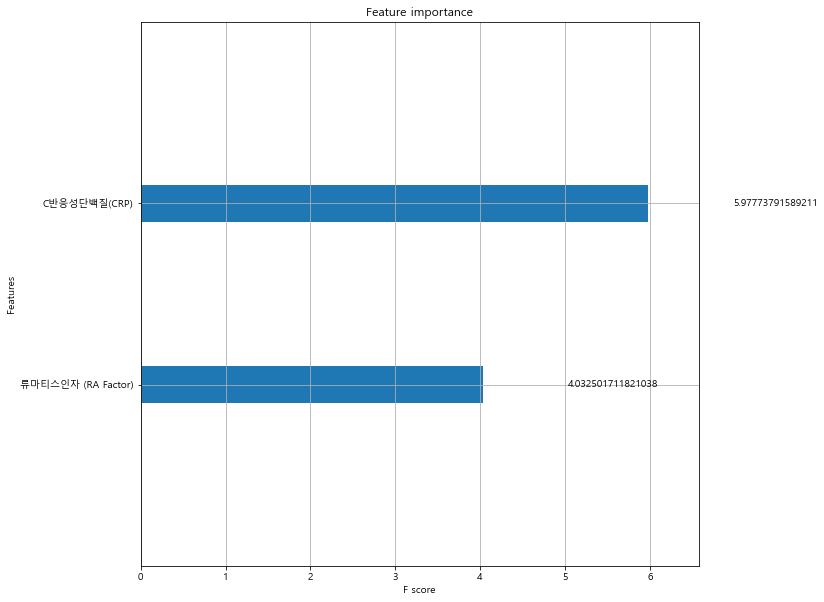

In [237]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [238]:
model.feature_importances_

array([0.4028377, 0.5971623], dtype=float32)

In [239]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [240]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,C반응성단백질(CRP),0.597162
0,류마티스인자 (RA Factor),0.402838


# 실제지수 - 예측지수 결과

In [241]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,95.0
1,134.0
2,118.0
3,140.0
4,104.0
...,...
116272,90.0
116273,110.0
116274,90.0
116275,101.0


In [242]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,94.048882
1,133.682968
2,113.720444
3,140.239380
4,102.905396
...,...
116272,94.048882
116273,110.549347
116274,94.048882
116275,100.559418


In [243]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [244]:
df_test.head()

,target,0
0,95.0,94.048882
1,134.0,133.682968
2,118.0,113.720444
3,140.0,140.239380
4,104.0,102.905396


In [245]:
df_test.columns

Index(['target', 0], dtype='object')

In [246]:
df_test.columns = ['실제지수', '예측지수']

In [247]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [248]:
df_test.head()

,실제지수,예측지수,diff
0,95.0,94.048882,-0.951118
1,134.0,133.682968,-0.317032
2,118.0,113.720444,-4.279556
3,140.0,140.239380,0.239380
4,104.0,102.905396,-1.094604


In [249]:
df_test['diff_int'] = df_test['diff'].round(0)

In [250]:
len(df_test)

116277

In [251]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,95.0,94.048882,-0.951118,-1.0
1,134.0,133.682968,-0.317032,-0.0
2,118.0,113.720444,-4.279556,-4.0
3,140.0,140.239380,0.239380,0.0
4,104.0,102.905396,-1.094604,-1.0


<AxesSubplot:>

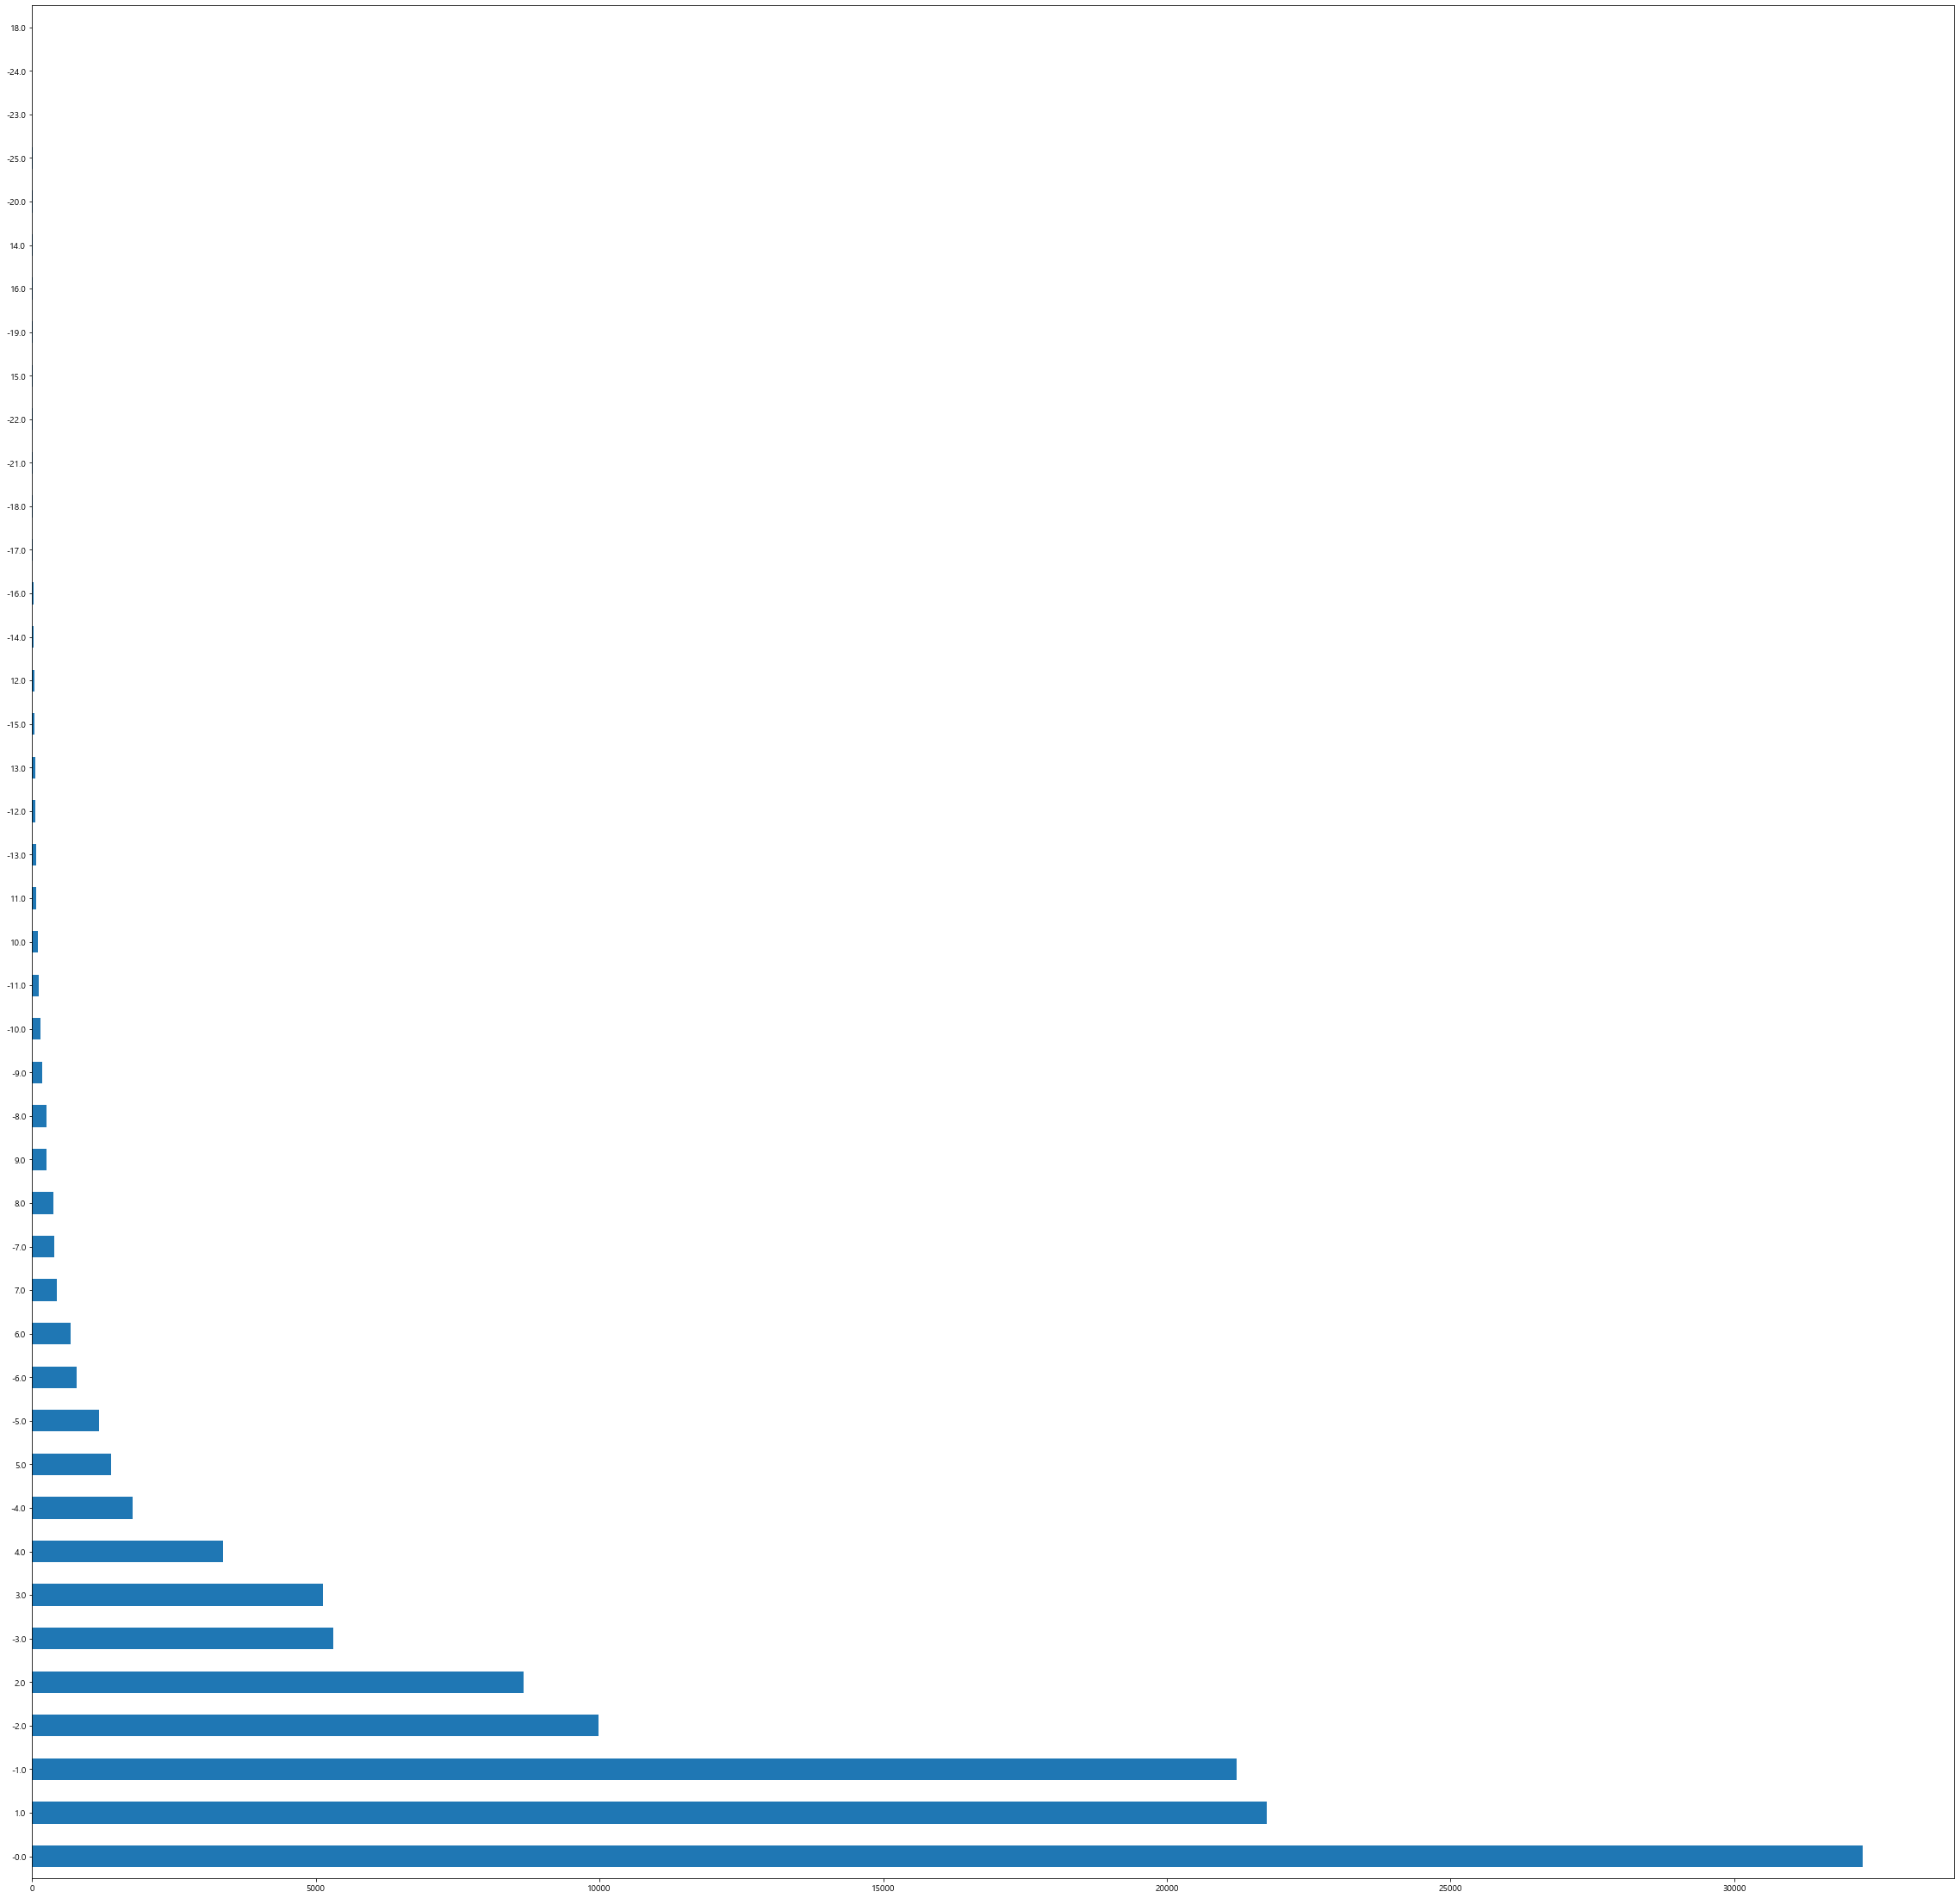

In [252]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [253]:
df_test['diff_int'].value_counts(ascending=False)

-0.0     32261
 1.0     21753
-1.0     21235
-2.0      9983
 2.0      8657
-3.0      5311
 3.0      5122
 4.0      3364
-4.0      1777
 5.0      1395
-5.0      1181
-6.0       784
 6.0       684
 7.0       437
-7.0       384
 8.0       377
 9.0       258
-8.0       253
-9.0       174
-10.0      151
-11.0      114
 10.0      109
 11.0       77
-13.0       68
-12.0       64
 13.0       59
-15.0       43
 12.0       42
-14.0       23
-16.0       21
-17.0       16
-18.0       15
-21.0       14
-22.0       13
 15.0       12
-19.0       12
 16.0        8
 14.0        7
-20.0        7
-25.0        7
-23.0        2
-24.0        2
 18.0        1
Name: diff_int, dtype: int64

In [254]:
df_test['예측지수'].round(0).value_counts()

94.0     8670
103.0    7269
100.0    7227
95.0     4648
111.0    4412
99.0     4208
101.0    3945
106.0    3478
96.0     3376
119.0    3247
80.0     2476
108.0    2443
113.0    2274
120.0    2257
104.0    2239
102.0    2196
98.0     2158
84.0     2146
77.0     2020
86.0     1888
82.0     1880
105.0    1826
124.0    1756
89.0     1680
107.0    1666
97.0     1583
121.0    1579
79.0     1397
117.0    1346
78.0     1335
76.0     1322
118.0    1242
85.0     1203
83.0     1202
122.0    1122
88.0     1101
123.0    1038
115.0    1003
114.0     989
81.0      935
87.0      892
109.0     888
91.0      843
72.0      794
125.0     771
90.0      768
116.0     713
93.0      684
73.0      664
75.0      619
110.0     532
112.0     480
126.0     474
92.0      414
130.0     370
127.0     367
74.0      311
144.0     304
139.0     302
59.0      293
56.0      261
141.0     259
55.0      248
66.0      225
143.0     222
145.0     222
57.0      213
132.0     206
128.0     188
64.0      185
131.0     172
134.0 

# 예측 나이 분포

In [255]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [256]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [257]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [258]:
df_plot = pd.DataFrame(y_test.value_counts())

In [259]:
df_plot.columns = ['count']

In [260]:
df_plot.reset_index(inplace=True)

In [261]:
df_plot = df_plot.sort_values('index', ascending=True)

In [262]:
df_plot

,index,count
95,52.0,5
94,53.0,27
88,54.0,141
61,55.0,239
59,56.0,253
73,57.0,186
64,58.0,218
68,59.0,200
75,60.0,186
81,61.0,152


In [263]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

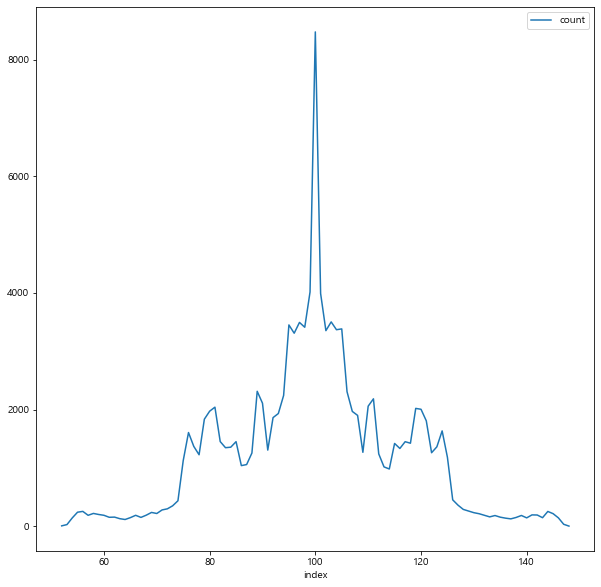

In [264]:
df_plot.plot()

In [265]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [266]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [267]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [268]:
df_plot.columns = ['count']

In [269]:
df_plot.reset_index(inplace=True)

In [270]:
df_plot = df_plot.sort_values(0, ascending=True)

In [271]:
df_plot.set_index(0, inplace=True)

In [272]:
df_plot

,count
0,
53.0,12
54.0,125
55.0,248
56.0,261
57.0,213
58.0,128
59.0,293
60.0,159
61.0,157


<AxesSubplot:xlabel='0'>

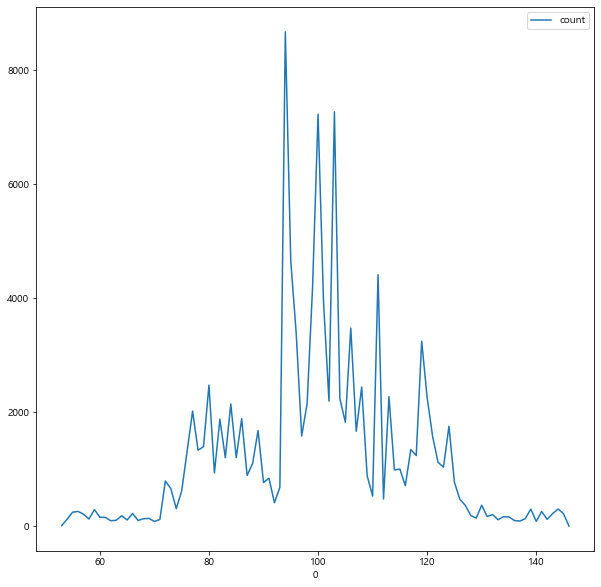

In [273]:
df_plot.plot()

# 시각화

In [274]:
# model.coef_

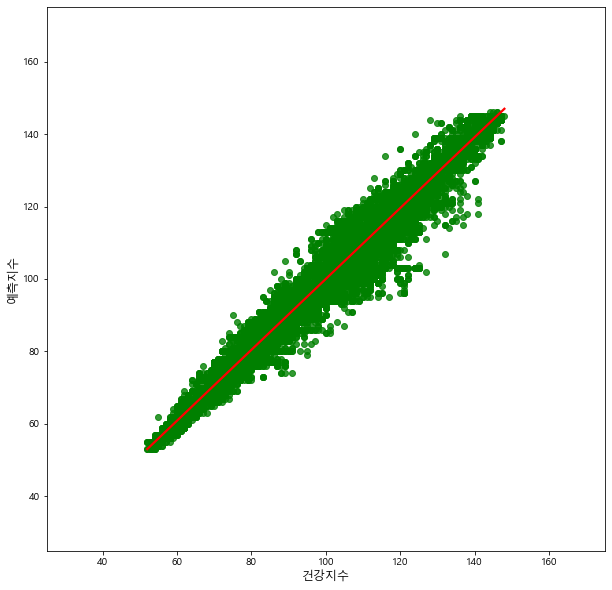

In [275]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [276]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
0,2019,50,356493,1,53,6.0,0.13,99.93,100.00,99.96,100.0
1,2022,62,1356310,1,43,6.0,0.07,100.13,200.00,150.06,125.0
2,2023,62,2170394,1,44,7.0,0.11,96.67,174.49,135.58,118.0
3,2020,67,481109,1,52,17.7,0.13,3.00,100.00,51.50,76.0
4,2021,67,643695,1,53,10.7,0.13,63.18,100.00,81.59,91.0


In [277]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380745 entries, 0 to 380744
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   검진년도                    380745 non-null  int64  
 1   UID                     380745 non-null  int64  
 2   CU_REC_ID               380745 non-null  int64  
 3   SEX                     380745 non-null  int64  
 4   검진당시나이                  380745 non-null  int64  
 5   류마티스인자 (RA Factor)      380745 non-null  float64
 6   C반응성단백질(CRP)            380745 non-null  float64
 7   류마티스인자 (RA Factor)_kde  380745 non-null  float64
 8   C반응성단백질(CRP)_kde        380745 non-null  float64
 9   kde_mean                380745 non-null  float64
 10  target                  380745 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 32.0 MB


In [278]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
57122,2022,168996,2259500,1,35,6.2,0.001,101.54,131.07,116.30,108.0
57123,2023,168996,2259499,1,36,8.8,0.100,77.25,179.72,128.49,114.0
57124,2024,168996,2281994,1,37,10.0,0.300,77.13,33.59,55.36,78.0


In [279]:
train_columns

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [280]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [281]:
len(df_pred)

380745

In [282]:
df_pred.reset_index(drop=True, inplace=True)

In [283]:
X_test

,류마티스인자 (RA Factor),C반응성단백질(CRP)
363290,10.0,0.13
204589,2.0,0.02
187646,10.0,0.03
263107,2.0,0.05
89698,4.9,0.13
...,...,...
71549,10.0,0.13
1277,3.0,0.13
321270,10.0,0.13
131822,5.9,0.13


In [284]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '류마티스인자 (RA Factor)',
       'C반응성단백질(CRP)', '류마티스인자 (RA Factor)_kde', 'C반응성단백질(CRP)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [285]:
df_pred[train_columns]

,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,6.0,0.130
1,6.0,0.070
2,7.0,0.110
3,17.7,0.130
4,10.7,0.130
...,...,...
380740,10.0,0.130
380741,10.0,0.130
380742,10.0,0.001
380743,10.0,0.200


In [286]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [287]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [288]:
pred_data = pred_data.round(0)

In [289]:
pred_data

array([100., 125., 114., ..., 103.,  84., 103.], dtype=float32)

In [290]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [291]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [292]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target,예측지수
0,2019,50,356493,1,53,6.00,0.13,99.93,100.00,99.96,100.0,100.0
1,2022,62,1356310,1,43,6.00,0.07,100.13,200.00,150.06,125.0,125.0
2,2023,62,2170394,1,44,7.00,0.11,96.67,174.49,135.58,118.0,114.0
3,2020,67,481109,1,52,17.70,0.13,3.00,100.00,51.50,76.0,76.0
4,2021,67,643695,1,53,10.70,0.13,63.18,100.00,81.59,91.0,89.0
5,2022,76,1377275,1,52,7.00,0.13,97.91,100.00,98.96,99.0,99.0
6,2023,77,1739126,1,29,6.30,0.13,98.46,100.00,99.23,100.0,100.0
7,2024,77,2575587,1,30,5.60,0.13,101.95,100.00,100.98,100.0,101.0
8,2022,79,1369378,1,58,9.80,0.13,75.74,100.00,87.87,94.0,95.0
9,2023,79,2667016,1,59,7.00,0.13,90.69,100.00,95.34,98.0,99.0


## 예측지수 성능평가

In [293]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

1.544311809741428

# target으로 나이 계산

In [294]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [295]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target,예측지수,예측나이
0,2019,50,356493,1,53,6.00,0.13,99.93,100.00,99.96,100.0,100.0,53.0
1,2022,62,1356310,1,43,6.00,0.07,100.13,200.00,150.06,125.0,125.0,38.0
2,2023,62,2170394,1,44,7.00,0.11,96.67,174.49,135.58,118.0,114.0,41.2
3,2020,67,481109,1,52,17.70,0.13,3.00,100.00,51.50,76.0,76.0,56.8
4,2021,67,643695,1,53,10.70,0.13,63.18,100.00,81.59,91.0,89.0,55.2
5,2022,76,1377275,1,52,7.00,0.13,97.91,100.00,98.96,99.0,99.0,52.2
6,2023,77,1739126,1,29,6.30,0.13,98.46,100.00,99.23,100.0,100.0,29.0
7,2024,77,2575587,1,30,5.60,0.13,101.95,100.00,100.98,100.0,101.0,29.8
8,2022,79,1369378,1,58,9.80,0.13,75.74,100.00,87.87,94.0,95.0,59.0
9,2023,79,2667016,1,59,7.00,0.13,90.69,100.00,95.34,98.0,99.0,59.2


## 예측나이 성능평가

In [296]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

2.1341133829728562

# 최종 산출

In [297]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target,예측지수,예측나이
0,2019,50,356493,1,53,6.0,0.13,99.93,100.00,99.96,100.0,100.0,53.0
1,2022,62,1356310,1,43,6.0,0.07,100.13,200.00,150.06,125.0,125.0,38.0
2,2023,62,2170394,1,44,7.0,0.11,96.67,174.49,135.58,118.0,114.0,41.2
3,2020,67,481109,1,52,17.7,0.13,3.00,100.00,51.50,76.0,76.0,56.8
4,2021,67,643695,1,53,10.7,0.13,63.18,100.00,81.59,91.0,89.0,55.2


# DataMart csv

In [298]:
df_copy = df.copy()

In [299]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN


In [300]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   검진년도                1213899 non-null  int64  
 1   UID                 1213899 non-null  int64  
 2   CU_REC_ID           1213899 non-null  int64  
 3   SEX                 1213899 non-null  int64  
 4   검진당시나이              1213899 non-null  int64  
 5   류마티스인자 (RA Factor)  688638 non-null   float64
 6   C반응성단백질(CRP)        298862 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 64.8 MB


In [301]:
minimums

[-7.5, -0.395]

In [302]:
maximums

[22.5, 0.625]

In [303]:
train_columns

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [304]:
for idx, col in enumerate(train_columns):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [305]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [306]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN


## 검진 항목 all 결측치 지우기

In [307]:
target_cols

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [308]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [309]:
df_man_csv.reset_index(drop=True, inplace=True)

In [310]:
len(df_man_csv)

456535

## fillna

In [311]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 스크리닝

In [312]:
# screening = 80

In [313]:
# scr_col = 'ALP'

In [314]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [315]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [316]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [317]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [318]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [319]:
# len(df_man_csv)

## 모델 예측

In [320]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [321]:
pred_data = pred_data.round(0)

In [322]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [323]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수
0,2010,36823,4439,1,42,11.6,0.13,82.0
1,2010,40309,1114,1,39,18.0,0.13,76.0
2,2010,40808,3073,1,35,15.0,0.13,77.0
3,2010,105315,3880,1,33,3.5,0.13,108.0
4,2010,105646,2503,1,29,0.0,0.00,130.0


### 성능 평가

In [325]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [326]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [327]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [328]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 2.3191317204595485


In [329]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.8777914139424701

In [330]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
0,2010,36823,4439,1,42,11.6,0.13,82.0,45.6
1,2010,40309,1114,1,39,18.0,0.13,76.0,43.8
2,2010,40808,3073,1,35,15.0,0.13,77.0,39.6
3,2010,105315,3880,1,33,3.5,0.13,108.0,31.4
4,2010,105646,2503,1,29,0.0,0.00,130.0,23.0


In [331]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456535 entries, 0 to 456534
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   검진년도                456535 non-null  int64  
 1   UID                 456535 non-null  int64  
 2   CU_REC_ID           456535 non-null  int64  
 3   SEX                 456535 non-null  int64  
 4   검진당시나이              456535 non-null  int64  
 5   류마티스인자 (RA Factor)  456535 non-null  float64
 6   C반응성단백질(CRP)        456535 non-null  float64
 7   예측지수                456535 non-null  float32
 8   예측나이                456535 non-null  float64
dtypes: float32(1), float64(3), int64(5)
memory usage: 29.6 MB


# 최종 UID별 확인

In [332]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
139574,2022,175673,751348,1,48,7.3,0.130,98.0,48.4
139575,2022,175673,1463838,1,48,7.3,0.100,118.0,44.4
139576,2022,175673,2169120,1,48,7.3,0.100,118.0,44.4
139577,2022,175673,2238320,1,48,7.3,0.100,118.0,44.4
139578,2022,175673,2246042,1,48,7.3,0.100,118.0,44.4
243275,2023,175673,1463893,1,49,1.7,0.001,128.0,43.4
243276,2023,175673,2169119,1,49,1.7,0.001,128.0,43.4
243277,2023,175673,2238319,1,49,1.7,0.001,128.0,43.4
243278,2023,175673,2246041,1,49,1.7,0.001,128.0,43.4
398208,2024,175673,2246079,1,50,10.0,0.100,113.0,47.4


In [333]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
93320,2021,289587,796178,1,47,8.0,0.13,96.0,47.8
158741,2022,289587,866076,1,48,7.7,0.13,97.0,48.6
279485,2023,289587,1487447,1,49,7.4,0.10,116.0,45.8
279486,2023,289587,2227964,1,49,7.4,0.10,116.0,45.8
407546,2024,289587,2243723,1,50,10.0,0.10,113.0,47.4


In [334]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
222246,2022,897603,1068885,1,51,8.2,0.1,114.0,48.2
222247,2022,897603,1728532,1,51,8.2,0.1,114.0,48.2
222248,2022,897603,2555144,1,51,8.2,0.1,114.0,48.2
344559,2023,897603,1458387,1,52,7.0,0.1,118.0,48.4
344560,2023,897603,1728531,1,52,7.0,0.1,118.0,48.4
344561,2023,897603,2555143,1,52,7.0,0.1,118.0,48.4
439729,2024,897603,2338214,1,53,10.0,0.1,113.0,50.4
439730,2024,897603,2555142,1,53,10.0,0.1,113.0,50.4


In [335]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
130053,2022,119172,751336,1,41,7.5,0.100,116.0,37.8
130054,2022,119172,1432355,1,41,7.5,0.100,116.0,37.8
130055,2022,119172,2247083,1,41,7.5,0.100,116.0,37.8
130056,2022,119172,2252956,1,41,7.5,0.100,116.0,37.8
233425,2023,119172,1436742,1,42,7.4,0.001,107.0,40.6
233426,2023,119172,2247082,1,42,7.4,0.001,107.0,40.6
233427,2023,119172,2252955,1,42,7.4,0.001,107.0,40.6
393495,2024,119172,2250063,1,43,10.0,0.001,103.0,42.4
393496,2024,119172,2252954,1,43,10.0,0.001,103.0,42.4


In [336]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
344554,2023,897595,1525045,1,40,10.0,0.001,103.0,39.4
344555,2023,897595,1593851,1,40,10.0,0.001,103.0,39.4
344556,2023,897595,2328772,1,40,10.0,0.001,103.0,39.4
439727,2024,897595,2329051,1,41,10.0,0.001,103.0,40.4


In [337]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
188223,2022,492764,909688,1,39,5.1,0.001,112.0,36.6
188224,2022,492764,1668547,1,39,5.1,0.001,112.0,36.6
188225,2022,492764,2783328,1,39,5.1,0.001,112.0,36.6
309619,2023,492764,1503842,1,40,7.3,0.625,74.0,45.2
309620,2023,492764,1674730,1,40,7.3,0.625,74.0,45.2
309621,2023,492764,2222919,1,40,7.3,0.625,74.0,45.2
309622,2023,492764,2246772,1,40,7.3,0.625,74.0,45.2
309623,2023,492764,2343194,1,40,7.3,0.625,74.0,45.2
309624,2023,492764,2477062,1,40,7.3,0.625,74.0,45.2
309625,2023,492764,2783327,1,40,7.3,0.625,74.0,45.2


In [338]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
347357,2023,933936,1431742,1,40,6.7,0.3,82.0,43.6
347358,2023,933936,1435266,1,40,6.7,0.3,82.0,43.6
440708,2024,933936,2242997,1,41,10.0,0.3,77.0,45.6


In [339]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
138060,2022,168996,919754,1,35,6.2,0.001,110.0,33.0
138061,2022,168996,1425925,1,35,6.2,0.001,110.0,33.0
138062,2022,168996,2259500,1,35,6.2,0.001,110.0,33.0
241703,2023,168996,1425970,1,36,8.8,0.100,113.0,33.4
241704,2023,168996,2259499,1,36,8.8,0.100,113.0,33.4
397469,2024,168996,2281994,1,37,10.0,0.300,77.0,41.6


# 여성 모델

In [340]:
df_target['SEX'].value_counts()

1    731426
2    432462
Name: SEX, dtype: int64

In [341]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

432462

# 결측치 처리

## 결측치 삭제

In [342]:
# df_woman.dropna(inplace=True)

In [343]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
772924,2010,710490,213,2,28,11.2,NaN,36.74,100.0,68.37,84.0
734846,2010,315847,230,2,23,4.1,NaN,146.47,100.0,123.24,112.0
737170,2010,719072,231,2,24,8.2,NaN,83.00,100.0,91.50,96.0
995758,2010,552037,332,2,41,NaN,NaN,100.00,100.0,100.00,100.0
772925,2010,710522,632,2,28,NaN,NaN,100.00,100.0,100.00,100.0


## 결측치 평균으로 대체

In [344]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [345]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [346]:
target_cols

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [347]:
len(df_woman)

432462

In [348]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [349]:
len(df_woman)

252556

In [350]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
772924,2010,710490,213,2,28,11.2,NaN,36.74,100.0,68.37,84.0
734846,2010,315847,230,2,23,4.1,NaN,146.47,100.0,123.24,112.0
737170,2010,719072,231,2,24,8.2,NaN,83.00,100.0,91.50,96.0
835813,2010,703063,1116,2,32,11.0,NaN,55.60,100.0,77.80,89.0
761065,2010,713853,1218,2,27,3.9,NaN,142.82,100.0,121.41,111.0


In [351]:
len(df_woman)

252556

## fillna

In [352]:
df_woman.mean().round(2)

검진년도                         2022.15
UID                        513245.85
CU_REC_ID                 1542421.42
SEX                             2.00
검진당시나이                         38.65
류마티스인자 (RA Factor)              7.40
C반응성단백질(CRP)                    0.10
류마티스인자 (RA Factor)_kde        103.90
C반응성단백질(CRP)_kde              114.30
kde_mean                      109.10
target                        104.55
dtype: float64

In [353]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [354]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [355]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [356]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [357]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
772924,2010,710490,213,2,28,11.2,0.1,36.74,100.0,68.37,84.0
734846,2010,315847,230,2,23,4.1,0.1,146.47,100.0,123.24,112.0
737170,2010,719072,231,2,24,8.2,0.1,83.00,100.0,91.50,96.0
835813,2010,703063,1116,2,32,11.0,0.1,55.60,100.0,77.80,89.0
761065,2010,713853,1218,2,27,3.9,0.1,142.82,100.0,121.41,111.0


# 스크리닝

## 스크리닝

In [358]:
# screening = 80

In [359]:
# scr_col = 'ALP'

In [360]:
# df_woman[df_woman[scr_col] < screening].head()

In [361]:
# len(df_woman[df_woman[scr_col] < screening])

In [362]:
# df_woman.loc[df_woman[scr_col] < screening, scr_col] = screening

In [363]:
# df_woman[df_woman[scr_col] < screening].head()

In [364]:
# len(df_woman[df_woman[scr_col] < screening])

# 중복 제거

In [365]:
len(df_woman)

252556

In [366]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [367]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
752435,2021,53,2632765,2,26,6.0,0.100,106.98,100.00,103.49,102.0
752434,2021,53,664316,2,26,6.0,0.100,106.98,100.00,103.49,102.0
801072,2024,53,2658222,2,29,10.0,0.100,79.98,121.02,100.50,100.0
805026,2020,54,497669,2,30,4.3,0.100,134.30,100.00,117.15,109.0
842583,2022,54,1319859,2,32,4.0,0.100,133.24,100.00,116.62,108.0
861933,2023,54,2039511,2,33,4.0,0.100,130.21,100.00,115.10,108.0
884086,2024,54,2750990,2,34,3.1,0.100,148.60,100.00,124.30,112.0
858900,2022,56,1351361,2,33,9.1,0.100,103.47,100.00,101.74,101.0
858899,2022,56,1019732,2,33,9.1,0.100,103.47,100.00,101.74,101.0
879090,2023,56,2032999,2,34,5.7,0.100,110.72,100.00,105.36,103.0


## first만 남겨두고 중복 제거

In [368]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [369]:
df_woman.reset_index(drop=True, inplace=True)

In [370]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
0,2021,53,2632765,2,26,6.0,0.100,106.98,100.00,103.49,102.0
1,2024,53,2658222,2,29,10.0,0.100,79.98,121.02,100.50,100.0
2,2020,54,497669,2,30,4.3,0.100,134.30,100.00,117.15,109.0
3,2022,54,1319859,2,32,4.0,0.100,133.24,100.00,116.62,108.0
4,2023,54,2039511,2,33,4.0,0.100,130.21,100.00,115.10,108.0
5,2024,54,2750990,2,34,3.1,0.100,148.60,100.00,124.30,112.0
6,2022,56,1351361,2,33,9.1,0.100,103.47,100.00,101.74,101.0
7,2023,56,2032999,2,34,5.7,0.100,110.72,100.00,105.36,103.0
8,2021,59,701026,2,29,9.1,0.100,80.35,100.00,90.18,95.0
9,2022,59,1376992,2,30,7.6,0.100,93.19,100.00,96.60,98.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

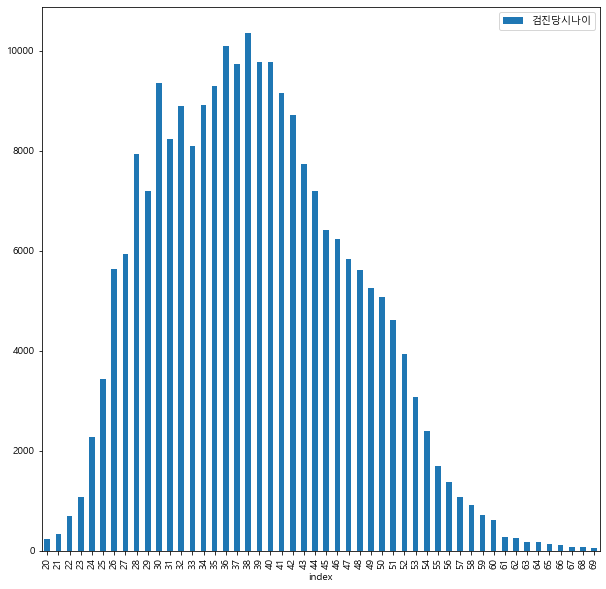

In [371]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [372]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
42,20,223
39,21,327
37,22,691
33,23,1077
30,24,2272
27,25,3428
21,26,5642
19,27,5935
13,28,7942
16,29,7189


# 검진항목 시각화

In [373]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
count,226064.000000,2.260640e+05,2.260640e+05,226064.0,226064.000000,226064.000000,226064.000000,226064.000000,226064.000000,226064.000000,226064.000000
mean,2022.068299,5.041150e+05,1.498398e+06,2.0,38.611566,7.387783,0.101469,103.932867,114.377810,109.155449,104.575974
std,1.505622,3.709361e+05,8.132569e+05,0.0,8.433910,3.468975,0.083260,37.350174,44.630502,28.512726,14.261322
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,0.000000,0.000000,0.240000,1.910000,3.060000,52.000000
25%,2021.000000,2.177008e+05,6.571268e+05,2.0,32.000000,5.100000,0.100000,91.310000,100.000000,95.970000,98.000000
50%,2022.000000,3.761775e+05,1.388964e+06,2.0,38.000000,7.400000,0.100000,100.170000,100.000000,105.340000,103.000000
75%,2023.000000,8.254682e+05,2.206141e+06,2.0,44.000000,10.000000,0.100000,120.840000,131.460000,127.350000,114.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,22.500000,0.620000,198.450000,200.570000,197.700000,149.000000


<AxesSubplot:xlabel='검진당시나이'>

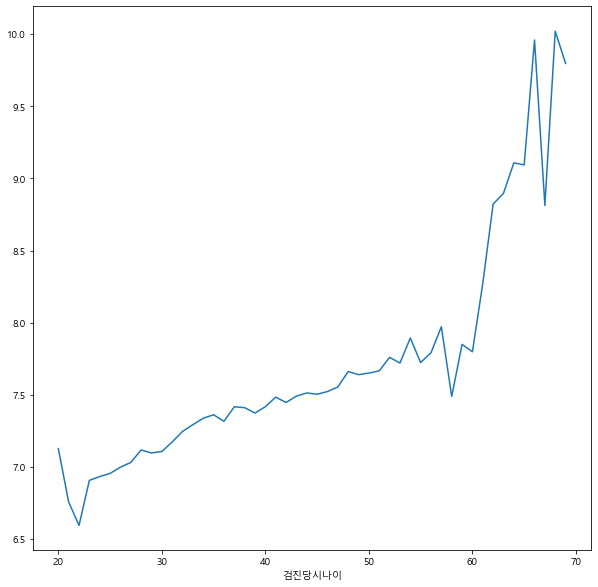

In [374]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

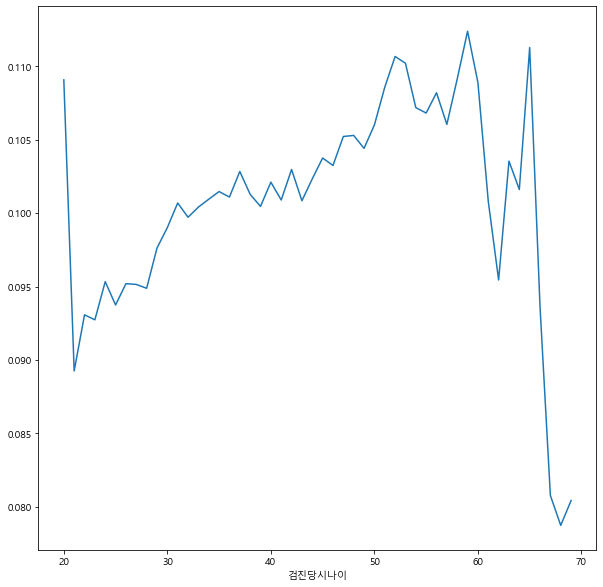

In [375]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

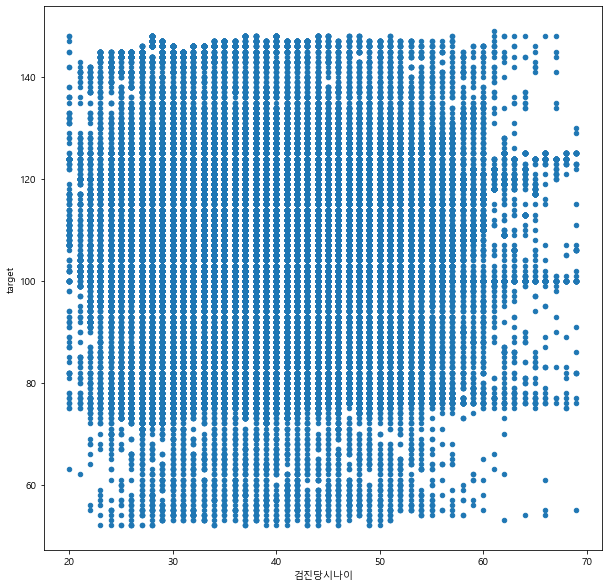

In [376]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

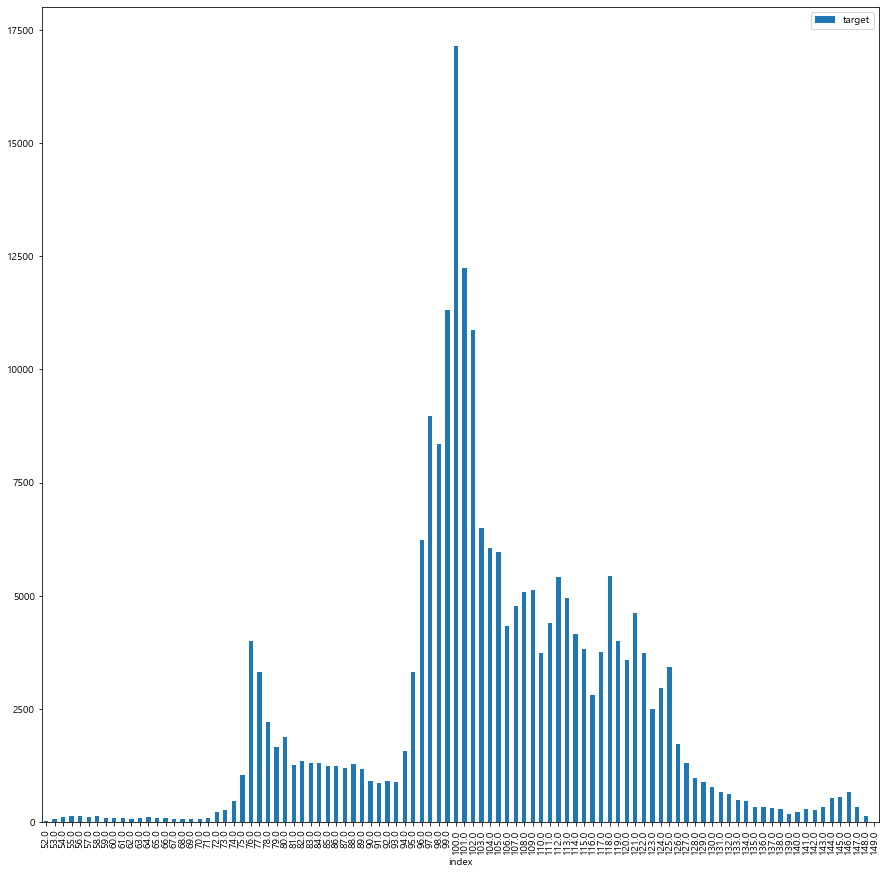

In [377]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [378]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
96,52.0,32
95,53.0,71
81,54.0,118
76,55.0,145
77,56.0,145
80,57.0,124
78,58.0,138
85,59.0,100
84,60.0,104
87,61.0,99


In [379]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [380]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

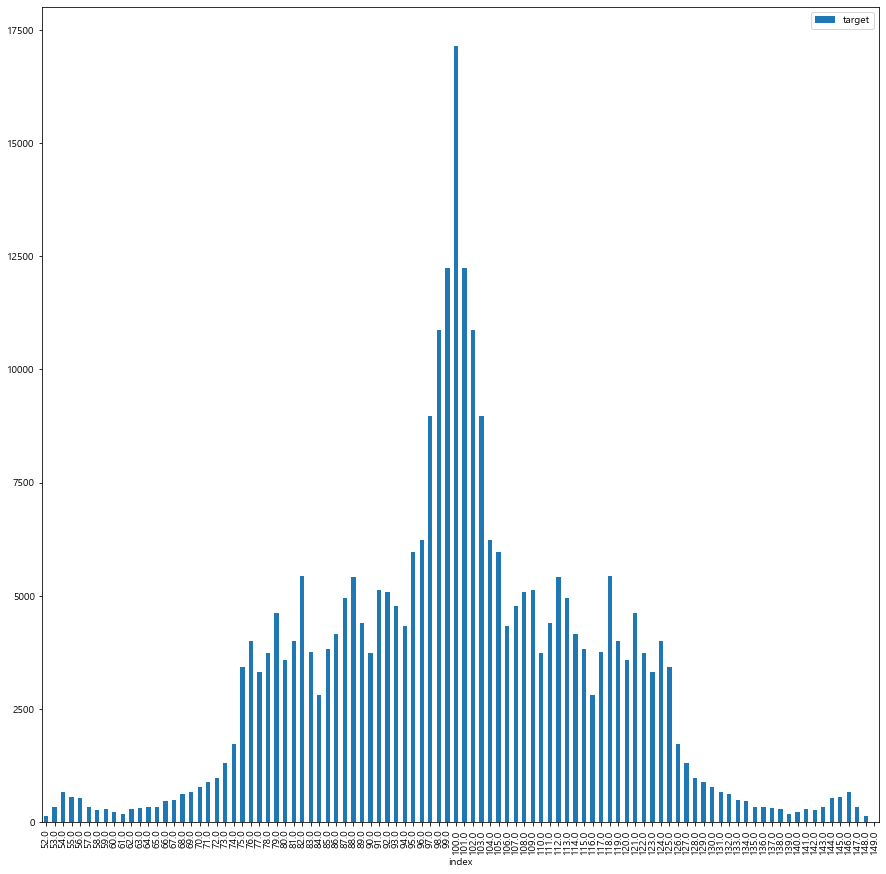

In [381]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [382]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
95,52.0,132
77,53.0,335
62,54.0,677
67,55.0,556
69,56.0,547
80,57.0,331
90,58.0,261
88,59.0,292
91,60.0,226
93,61.0,185


# 나이별 확인하기

In [383]:
# df_woman['검진당시나이'].value_counts()

In [384]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [385]:
# df_woman['검진당시나이'].min()

In [386]:
# df_woman['검진당시나이'].max()

In [387]:
# df_woman.columns

In [388]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [389]:
# df_temp.info()

In [390]:
# df_temp.reset_index(drop=True, inplace=True)

In [391]:
# df_woman = df_temp.copy()

In [392]:
# df_woman['검진당시나이'].value_counts()

In [393]:
# df_woman[df_woman['검진당시나이']==20]

In [394]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [395]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [396]:
train_columns

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [397]:
# target_col = '검진당시나이'

In [398]:
target_col

'target'

## Min Max Scaling

In [399]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
scaling_bool

False

In [401]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [402]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [403]:
# model2 = LinearRegression()

In [404]:
# model2.fit(X_train2, y_train2)

In [405]:
# model2.intercept_

In [406]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [407]:
# model2 = XGBRegressor()

In [408]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [409]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model2, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [410]:
# import time
# start = time.time()
# random_search.fit(X_train2, y_train2)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

In [411]:
# # best parameter
# random_search.best_params_

In [412]:
# # best score
# random_search.best_score_

In [413]:
# model2 = random_search.best_estimator_
# model2

## Keras

In [414]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [415]:
# model = build_model()

In [416]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [417]:
# model.summary()

In [418]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [419]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [420]:
# plot_history(history)

## pyTorch 신경망

In [421]:
np.shape(X_train)[1]

2

In [422]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [423]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [424]:
# epochs = 1000

In [425]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [426]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [427]:
# plt.plot(losses)

## coef 계산

In [428]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [429]:
# df_coef2.columns = ['검사항목', 'coef']

In [430]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [431]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [432]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [433]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [434]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [435]:
# slr2 = LinearRegression()

In [436]:
# slr2.fit(X_train2_poly, y_train2)

In [437]:
# np.shape(X_train2)

In [438]:
# np.shape(X_train2_poly)

In [439]:
# np.shape(X_test2)

In [440]:
# np.shape(X_test2_poly)

In [441]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [442]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [443]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [444]:
# import pickle
# with open(model_path_woman,'wb') as f:
#     pickle.dump(model2, f)

In [445]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [446]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [447]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [448]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 1.7898920520502506
MSE : 7.592848446286141
RMSE : 2.755512374547816


In [449]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.969562368713621

In [450]:
model2.score(X_test2, y_test2)

0.969562368713621

## feature importance

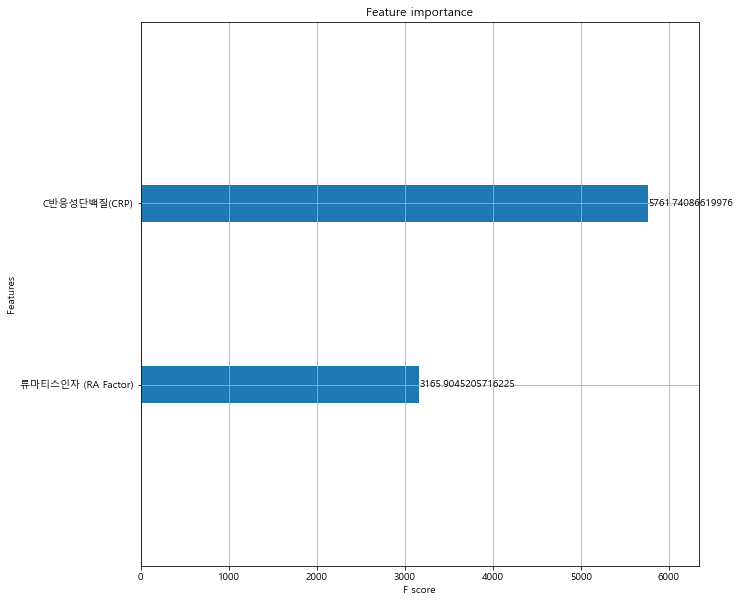

In [451]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [452]:
model2.feature_importances_

array([0.35461807, 0.64538187], dtype=float32)

In [453]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [454]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,C반응성단백질(CRP),0.645382
0,류마티스인자 (RA Factor),0.354618


# 실제나이 - 예측나이 결과

In [455]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [456]:
df_test2.head()

,target,0
0,92.0,92.263969
1,79.0,80.537140
2,108.0,107.727768
3,98.0,99.350029
4,88.0,88.288048


In [457]:
df_test2.columns

Index(['target', 0], dtype='object')

In [458]:
df_test2.columns = ['실제지수', '예측지수']

In [459]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [460]:
df_test2.head()

,실제지수,예측지수,diff
0,92.0,92.263969,0.263969
1,79.0,80.537140,1.537140
2,108.0,107.727768,-0.272232
3,98.0,99.350029,1.350029
4,88.0,88.288048,0.288048


In [461]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [462]:
len(df_test2)

75091

In [463]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,92.0,92.263969,0.263969,0.0
1,79.0,80.537140,1.537140,2.0
2,108.0,107.727768,-0.272232,-0.0
3,98.0,99.350029,1.350029,1.0
4,88.0,88.288048,0.288048,0.0


<AxesSubplot:>

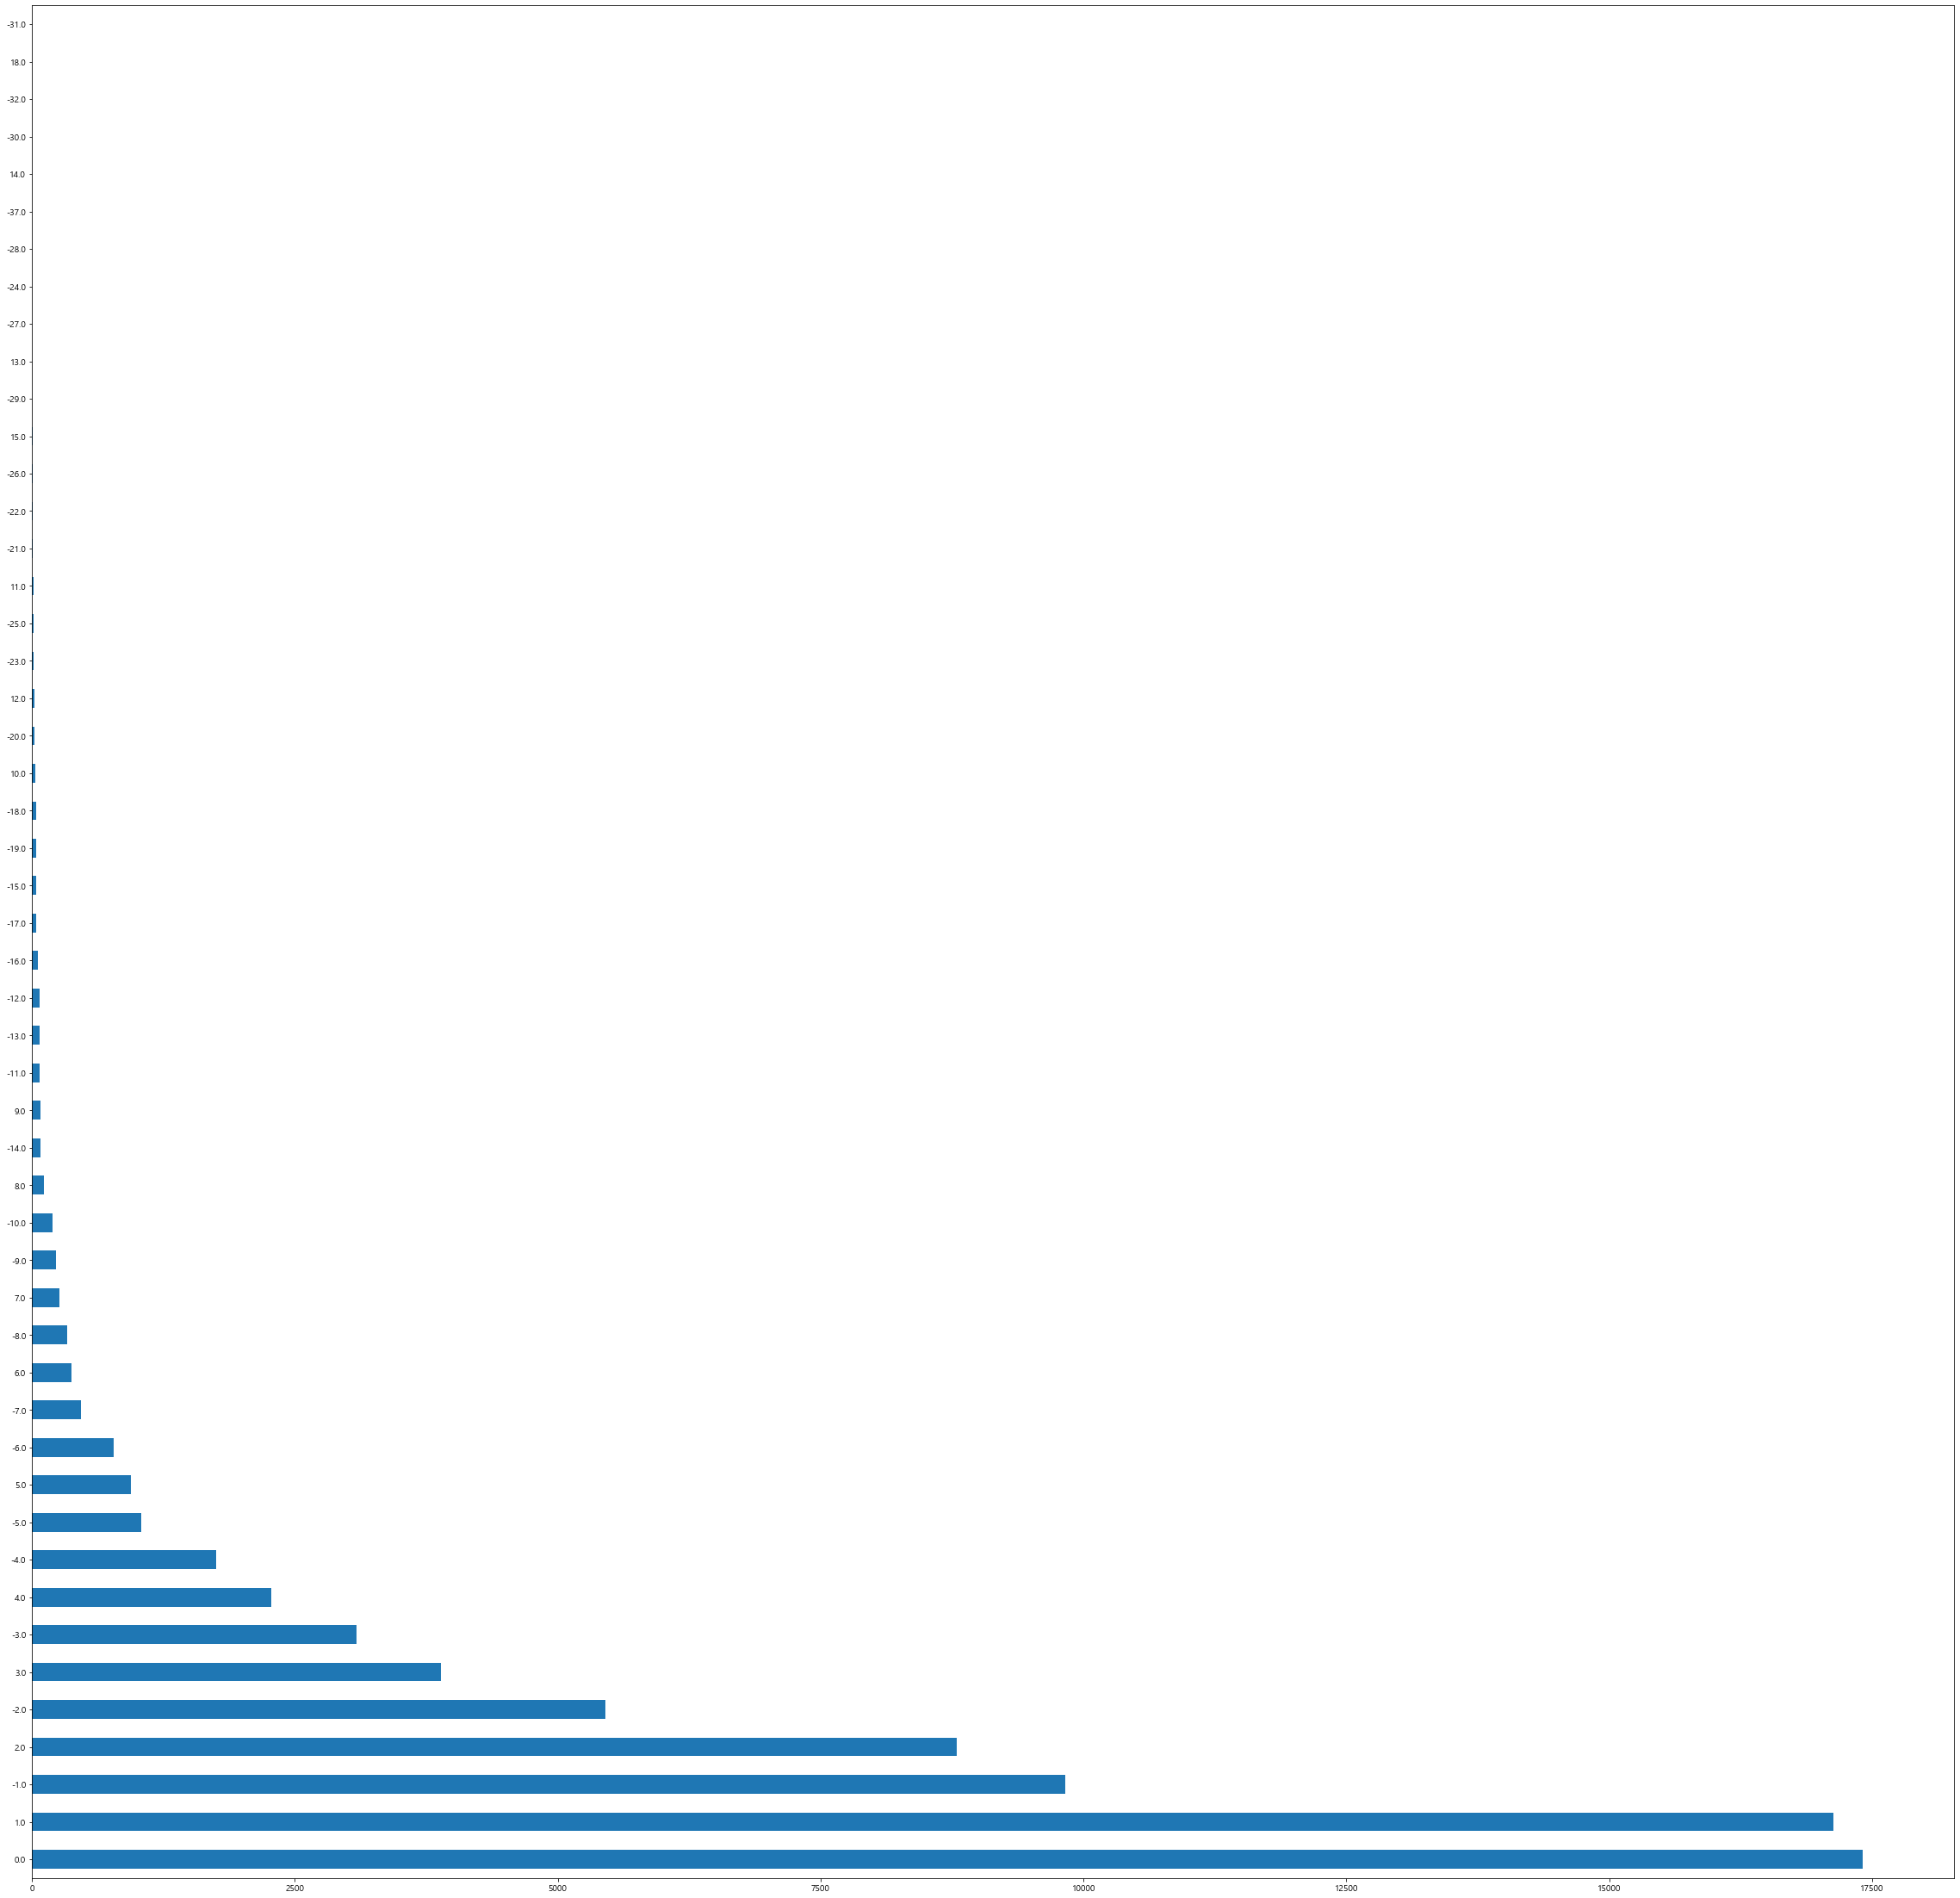

In [464]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [465]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [466]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [467]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [468]:
df_train2.round(0).value_counts()

99.0     26411
101.0    14278
98.0     10204
102.0     9564
113.0     8037
116.0     6664
100.0     6456
88.0      5993
106.0     5400
104.0     5096
110.0     4976
78.0      4272
122.0     4089
80.0      4089
93.0      3956
92.0      3867
79.0      3810
83.0      3751
118.0     3745
103.0     3670
117.0     3472
85.0      3366
124.0     3303
87.0      3245
81.0      2868
84.0      2867
105.0     2798
86.0      2771
91.0      2759
74.0      2742
89.0      2631
90.0      2616
107.0     2579
123.0     2478
82.0      2461
121.0     2421
119.0     2263
120.0     2201
108.0     2178
76.0      2131
112.0     2030
125.0     1985
109.0     1981
94.0      1913
77.0      1784
111.0     1596
97.0      1557
75.0      1268
95.0      1149
115.0     1013
126.0     1006
130.0      865
146.0      696
114.0      689
127.0      684
72.0       614
69.0       578
128.0      554
145.0      547
96.0       533
54.0       512
68.0       475
133.0      416
143.0      407
55.0       406
131.0      402
57.0      

In [469]:
y_test2.value_counts()

100.0    4298
99.0     3083
101.0    3042
102.0    2789
98.0     2708
103.0    2328
97.0     2224
104.0    1552
96.0     1531
95.0     1494
105.0    1479
118.0    1361
82.0     1348
112.0    1322
108.0    1308
88.0     1291
113.0    1271
92.0     1249
87.0     1241
91.0     1236
109.0    1202
121.0    1171
93.0     1163
107.0    1157
79.0     1137
89.0     1130
106.0    1101
114.0    1085
111.0    1084
94.0     1083
86.0     1056
81.0     1008
76.0     1007
83.0      987
119.0     984
115.0     969
78.0      953
124.0     950
117.0     949
110.0     947
85.0      943
120.0     941
122.0     932
90.0      926
125.0     889
80.0      882
77.0      864
75.0      844
123.0     835
116.0     719
84.0      661
126.0     445
74.0      442
127.0     340
73.0      330
72.0      245
128.0     243
71.0      228
129.0     219
70.0      194
146.0     187
54.0      177
130.0     174
69.0      171
131.0     160
132.0     154
68.0      150
55.0      140
66.0      136
145.0     132
67.0      131
144.0 

In [470]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [471]:
df_plot.columns = ['count']

In [472]:
df_plot.reset_index(inplace=True)

In [473]:
df_plot = df_plot.sort_values('index', ascending=True)

In [474]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

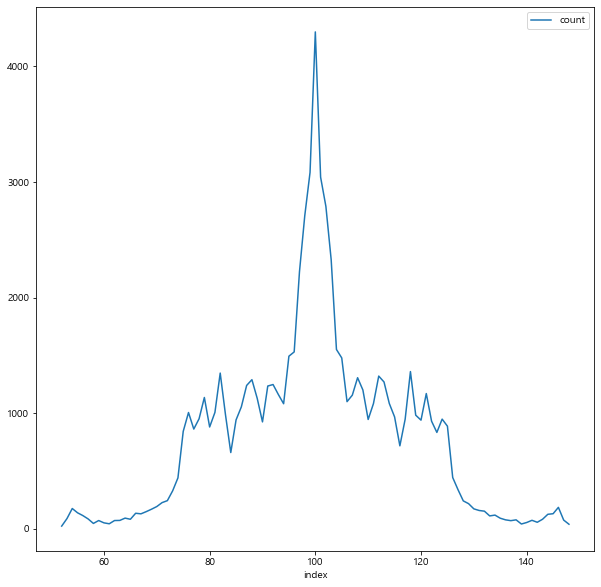

In [475]:
df_plot.plot()

In [476]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [477]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [478]:
df_test2.round(0).value_counts()

99.0     8887
101.0    4827
98.0     3348
102.0    3140
113.0    2738
116.0    2347
100.0    2200
88.0     1987
104.0    1748
106.0    1744
110.0    1604
80.0     1393
78.0     1376
122.0    1336
92.0     1277
79.0     1257
118.0    1256
93.0     1252
83.0     1246
103.0    1212
124.0    1105
117.0    1102
87.0     1096
85.0     1085
105.0    1032
81.0      996
84.0      987
86.0      904
74.0      883
107.0     881
91.0      879
89.0      847
121.0     839
90.0      830
123.0     828
82.0      782
119.0     769
76.0      738
120.0     697
125.0     684
108.0     681
112.0     677
109.0     636
94.0      630
77.0      617
111.0     555
97.0      501
75.0      419
95.0      392
126.0     345
115.0     321
130.0     286
127.0     228
146.0     222
114.0     218
72.0      217
96.0      205
69.0      203
145.0     202
54.0      177
128.0     162
68.0      157
67.0      150
129.0     142
143.0     134
55.0      133
66.0      133
56.0      130
131.0     122
133.0     121
70.0      119
144.0 

In [479]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [480]:
df_plot2.columns = ['count']

In [481]:
df_plot2.reset_index(inplace=True)

In [482]:
df_plot2

,0,count
0,99.0,8887
1,101.0,4827
2,98.0,3348
3,102.0,3140
4,113.0,2738
5,116.0,2347
6,100.0,2200
7,88.0,1987
8,104.0,1748
9,106.0,1744


In [483]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [484]:
df_plot2.set_index(0, inplace=True)

In [485]:
df_plot2

,count
0,
52.0,8
53.0,90
54.0,177
55.0,133
56.0,130
57.0,99
58.0,66
59.0,44
60.0,42


<AxesSubplot:xlabel='0'>

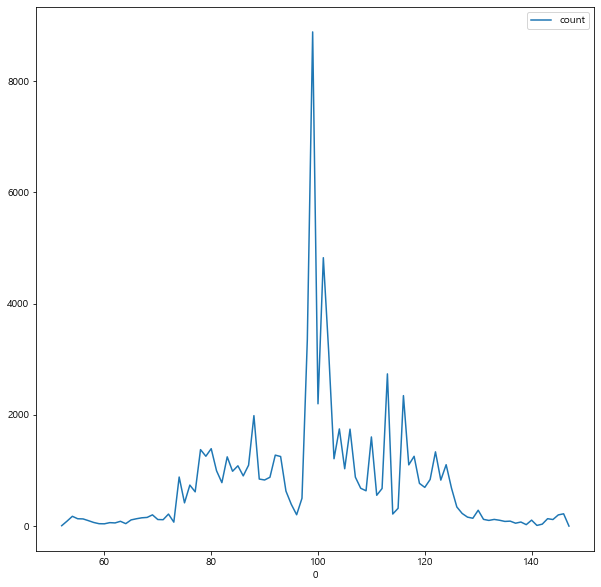

In [486]:
df_plot2.plot()

# 시각화

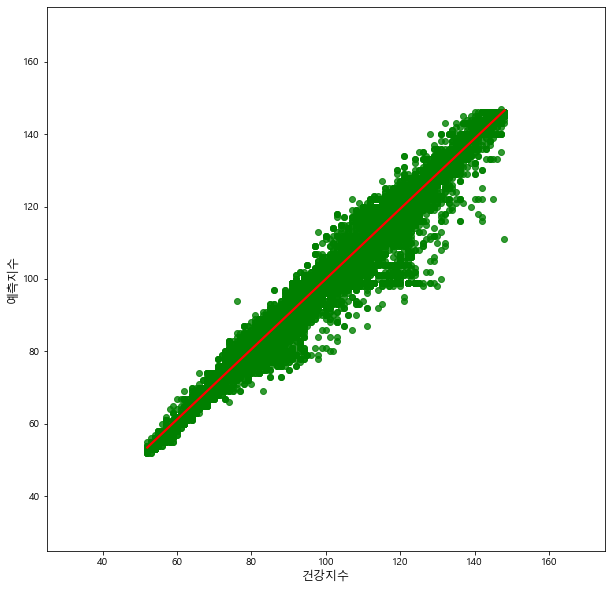

In [487]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [488]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target
0,2021,53,2632765,2,26,6.0,0.1,106.98,100.00,103.49,102.0
1,2024,53,2658222,2,29,10.0,0.1,79.98,121.02,100.50,100.0
2,2020,54,497669,2,30,4.3,0.1,134.30,100.00,117.15,109.0
3,2022,54,1319859,2,32,4.0,0.1,133.24,100.00,116.62,108.0
4,2023,54,2039511,2,33,4.0,0.1,130.21,100.00,115.10,108.0


In [489]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226064 entries, 0 to 226063
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   검진년도                    226064 non-null  int64  
 1   UID                     226064 non-null  int64  
 2   CU_REC_ID               226064 non-null  int64  
 3   SEX                     226064 non-null  int64  
 4   검진당시나이                  226064 non-null  int64  
 5   류마티스인자 (RA Factor)      226064 non-null  float64
 6   C반응성단백질(CRP)            226064 non-null  float64
 7   류마티스인자 (RA Factor)_kde  226064 non-null  float64
 8   C반응성단백질(CRP)_kde        226064 non-null  float64
 9   kde_mean                226064 non-null  float64
 10  target                  226064 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 19.0 MB


In [490]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target


In [491]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [492]:
len(df_pred2)

226064

In [493]:
df_pred2.reset_index(drop=True, inplace=True)

In [494]:
X_test2

,류마티스인자 (RA Factor),C반응성단백질(CRP)
10059,13.38,0.00
166657,7.40,0.30
826,4.60,0.10
195133,8.00,0.10
94691,11.00,0.10
...,...,...
37751,7.30,0.02
212399,9.00,0.20
85877,12.70,0.04
100862,5.90,0.10


In [495]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '류마티스인자 (RA Factor)',
       'C반응성단백질(CRP)', '류마티스인자 (RA Factor)_kde', 'C반응성단백질(CRP)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [496]:
df_pred2[train_columns]

,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,6.0,0.100
1,10.0,0.100
2,4.3,0.100
3,4.0,0.100
4,4.0,0.100
...,...,...
226059,10.0,0.001
226060,15.7,0.100
226061,10.0,0.100
226062,13.0,0.200


In [497]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [498]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [499]:
pred_data2

array([102.38593 ,  98.75065 , 108.878136, ...,  98.75065 ,  63.394947,
       101.00227 ], dtype=float32)

In [500]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [501]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [502]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,6.0,0.1,106.98,100.00,103.49,102.0,102.385933
1,2024,53,2658222,2,29,10.0,0.1,79.98,121.02,100.50,100.0,98.750648
2,2020,54,497669,2,30,4.3,0.1,134.30,100.00,117.15,109.0,108.878136
3,2022,54,1319859,2,32,4.0,0.1,133.24,100.00,116.62,108.0,109.509277
4,2023,54,2039511,2,33,4.0,0.1,130.21,100.00,115.10,108.0,109.509277
5,2024,54,2750990,2,34,3.1,0.1,148.60,100.00,124.30,112.0,112.816933
6,2022,56,1351361,2,33,9.1,0.1,103.47,100.00,101.74,101.0,98.003960
7,2023,56,2032999,2,34,5.7,0.1,110.72,100.00,105.36,103.0,103.330154
8,2021,59,701026,2,29,9.1,0.1,80.35,100.00,90.18,95.0,98.003960
9,2022,59,1376992,2,30,7.6,0.1,93.19,100.00,96.60,98.0,100.053276


## 예측지수 성능평가

In [503]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

1.841083830536378

# target으로 나이 계산

In [504]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [505]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,6.0,0.100,106.98,100.00,103.49,102.0,102.385933,25.52
1,2024,53,2658222,2,29,10.0,0.100,79.98,121.02,100.50,100.0,98.750648,29.25
2,2020,54,497669,2,30,4.3,0.100,134.30,100.00,117.15,109.0,108.878136,28.22
3,2022,54,1319859,2,32,4.0,0.100,133.24,100.00,116.62,108.0,109.509277,30.10
4,2023,54,2039511,2,33,4.0,0.100,130.21,100.00,115.10,108.0,109.509277,31.10
5,2024,54,2750990,2,34,3.1,0.100,148.60,100.00,124.30,112.0,112.816933,31.44
6,2022,56,1351361,2,33,9.1,0.100,103.47,100.00,101.74,101.0,98.003960,33.40
7,2023,56,2032999,2,34,5.7,0.100,110.72,100.00,105.36,103.0,103.330154,33.33
8,2021,59,701026,2,29,9.1,0.100,80.35,100.00,90.18,95.0,98.003960,29.40
9,2022,59,1376992,2,30,7.6,0.100,93.19,100.00,96.60,98.0,100.053276,29.99


## 예측나이 성능평가

In [506]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.1318963213957107

# 최종 산출

In [507]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),류마티스인자 (RA Factor)_kde,C반응성단백질(CRP)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,6.0,0.1,106.98,100.00,103.49,102.0,102.385933,25.52
1,2024,53,2658222,2,29,10.0,0.1,79.98,121.02,100.50,100.0,98.750648,29.25
2,2020,54,497669,2,30,4.3,0.1,134.30,100.00,117.15,109.0,108.878136,28.22
3,2022,54,1319859,2,32,4.0,0.1,133.24,100.00,116.62,108.0,109.509277,30.10
4,2023,54,2039511,2,33,4.0,0.1,130.21,100.00,115.10,108.0,109.509277,31.10


# DataMart csv

In [508]:
df_copy = df.copy()

In [509]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN


In [510]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   검진년도                1213899 non-null  int64  
 1   UID                 1213899 non-null  int64  
 2   CU_REC_ID           1213899 non-null  int64  
 3   SEX                 1213899 non-null  int64  
 4   검진당시나이              1213899 non-null  int64  
 5   류마티스인자 (RA Factor)  688638 non-null   float64
 6   C반응성단백질(CRP)        298862 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 64.8 MB


In [511]:
minimums

[-7.5, -0.395]

In [512]:
maximums

[22.5, 0.625]

In [513]:
train_columns

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [514]:
for idx, col in enumerate(train_columns):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [515]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [516]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP)
10,2010,15894,2533,2,29,4.7,NaN
22,2010,42223,1364,2,24,14.4,NaN
37,2011,364096,6645,2,32,NaN,NaN
45,2010,120518,3595,2,30,NaN,NaN
63,2011,698706,6600,2,36,NaN,NaN


## 검진 항목 all 결측치 지우기

In [517]:
target_cols

['류마티스인자 (RA Factor)', 'C반응성단백질(CRP)']

In [518]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [519]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [520]:
len(df_woman_csv)

268534

## fillna

In [521]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '류마티스인자 (RA Factor)',
       'C반응성단백질(CRP)', '류마티스인자 (RA Factor)_kde', 'C반응성단백질(CRP)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [522]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '류마티스인자 (RA Factor)',
       'C반응성단백질(CRP)'],
      dtype='object')

In [523]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 스크리닝

In [524]:
# screening = 80

In [525]:
# scr_col = 'ALP'

In [526]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [527]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [528]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [529]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [530]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [531]:
# len(df_woman_csv)

## 모델 예측

In [532]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [533]:
pred_data2 = pred_data2.round(0)

In [534]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [535]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수
0,2010,15894,2533,2,29,4.7,0.1,107.0
1,2010,42223,1364,2,24,14.4,0.1,78.0
2,2010,167053,3087,2,26,4.6,0.1,108.0
3,2010,211246,3089,2,24,5.3,0.1,105.0
4,2010,238661,2534,2,27,11.0,0.1,88.0


### 성능 평가

In [536]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [537]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [538]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [539]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 2.2395443407538718


In [540]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.8703794231165289

In [541]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
0,2010,15894,2533,2,29,4.7,0.1,107.0,27.6
1,2010,42223,1364,2,24,14.4,0.1,78.0,28.4
2,2010,167053,3087,2,26,4.6,0.1,108.0,24.4
3,2010,211246,3089,2,24,5.3,0.1,105.0,23.0
4,2010,238661,2534,2,27,11.0,0.1,88.0,29.4


In [542]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268534 entries, 0 to 268533
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   검진년도                268534 non-null  int64  
 1   UID                 268534 non-null  int64  
 2   CU_REC_ID           268534 non-null  int64  
 3   SEX                 268534 non-null  int64  
 4   검진당시나이              268534 non-null  int64  
 5   류마티스인자 (RA Factor)  268534 non-null  float64
 6   C반응성단백질(CRP)        268534 non-null  float64
 7   예측지수                268534 non-null  float32
 8   예측나이                268534 non-null  float64
dtypes: float32(1), float64(3), int64(5)
memory usage: 17.4 MB


# 최종 UID별 확인

In [543]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
57221,2021,261581,2243879,2,50,4.6,0.100,108.0,48.4
57222,2021,261581,2418909,2,50,4.6,0.100,108.0,48.4
57223,2021,261581,2418910,2,50,4.6,0.100,108.0,48.4
95919,2022,261581,751339,2,51,6.3,0.100,102.0,50.6
95921,2022,261581,2243878,2,51,6.3,0.100,102.0,50.6
156045,2023,261581,1519764,2,52,10.0,0.100,99.0,52.2
156046,2023,261581,2243877,2,52,10.0,0.100,99.0,52.2
241972,2024,261581,2418911,2,53,10.0,0.001,116.0,49.8


In [544]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
115084,2022,477944,2212776,2,31,6.2,0.1,102.0,30.6
188712,2023,477944,1454346,2,32,5.9,0.1,103.0,31.4
188713,2023,477944,2212775,2,32,5.9,0.1,103.0,31.4
251500,2024,477944,2362855,2,33,10.0,0.1,99.0,33.2


In [545]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,류마티스인자 (RA Factor),C반응성단백질(CRP),예측지수,예측나이
207045,2023,896916,1459636,2,28,6.1,0.001,121.0,23.8
207046,2023,896916,2031853,2,28,6.1,0.001,121.0,23.8
207047,2023,896916,2253054,2,28,6.1,0.001,121.0,23.8
259881,2024,896916,2253058,2,29,10.0,0.001,116.0,25.8


# 최종 CSV 병합 Extract

In [546]:
len(df_man_csv)

456535

In [547]:
len(df_woman_csv)

268534

In [548]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [549]:
df_csv.to_csv(csv_path)